# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Set the size of charts
plt.rc('figure', figsize=(16,9))
plt.style.use('fivethirtyeight')
sns.set_context(context={'figure.figsize': (16,9)})

# Pre-processing
from sklearn.preprocessing import StandardScaler

# Splitting data into training & test sets
from sklearn.model_selection import train_test_split, cross_val_score

# Modelling
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get the absolute path to the file
file_path = os.path.abspath('./../Income_Qualification_Latin_America_Population/Dataset/train.xlsx')
df_train = pd.read_excel(file_path)
df_train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,NaN,0,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,NaN,0,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,NaN,0,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,NaN,0,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [3]:
df_train.shape

(9557, 143)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
df_train.describe(include ='all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,9557,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
unique,9557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_279628684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,NaN,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,NaN,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,NaN,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,NaN,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,NaN,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000


In [6]:
# Get the absolute path to the file
file_path = os.path.abspath('./../Income_Qualification_Latin_America_Population/Dataset/test.xlsx')
df_test = pd.read_excel(file_path)
df_test

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,NaN,1,2,1,1,1,0,NaN,0,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a7c6953b,NaN,0,3,0,1,1,0,NaN,0,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,ID_07dbb4be2,NaN,0,3,0,1,1,0,NaN,0,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,ID_34d2ed046,NaN,0,3,0,1,1,0,NaN,0,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [8]:
df_test.shape

(23856, 142)

In [9]:
df_test.describe(include ='all')

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,23856,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
unique,23856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_2f6873615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,NaN,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,NaN,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,NaN,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,NaN,1.400000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,NaN,2.200000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000


# Null Values

The important piece of information here is that we don’t have ‘Target’ feature in Test Dataset. There are 5 object type, 130(Train set) / 129 (Test set) integer type and 8 float type features. Lets look at those features next.

In [10]:
#List the columns for different datatypes in train & test data:
print('Integer Type: ')
print(df_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(df_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(df_train.select_dtypes(object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [11]:
#List the columns for different datatypes in train & test data:
print('Integer Type: ')
print(df_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(df_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(df_train.select_dtypes(object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [12]:
#v2a1, Monthly rent payment
#v18q1: Number of tablets household owns
#rez_esc: Years behind in school
#meaneduc: Average years of education for adults (18+)
#SQBmeaned: Square of the mean years of education of adults (>=18) in the household

In [13]:
#df_train_hypo = df_train.dropna()
#df_train_hypo.shape

### The null values cannot simply all be dropped - otherwise, there would be just over 150 rows of data which would make it very difficult to train a valid model.

# ---------------------

We also noticed that object type features dependency, edjefe, edjefa have mixed values. Lets fix the data for features with null values and features with mixed values. For these three variables, it seems “yes” = 1 and “no” = 0. We can correct the variables using a mapping and convert to floats.

- dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

- edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

- edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [14]:
mapping={'yes':1,'no':0}

for df in [df_train, df_test]:
    df['dependency'] =df['dependency'].replace(mapping).astype(np.float64)
    df['edjefe'] =df['edjefe'].replace(mapping).astype(np.float64)
    df['edjefa'] =df['edjefa'].replace(mapping).astype(np.float64)
    
df_train[['dependency','edjefe','edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.149550,5.096788,2.896830
std,1.605993,5.246513,4.612056
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,6.000000,0.000000
75%,1.333333,9.000000,6.000000
max,8.000000,21.000000,21.000000


In [15]:
# Lets fix the column with null values

# 'v2a1' variable

In [16]:
df_own = df_train[df_train['v2a1'].isnull()]
own_variables = [x for x in df_train.columns if x.startswith('tipo')]
df_own = df_own[own_variables]
df_own.sum()

tipovivi1    5911
tipovivi2       0
tipovivi3       0
tipovivi4     163
tipovivi5     786
dtype: int64

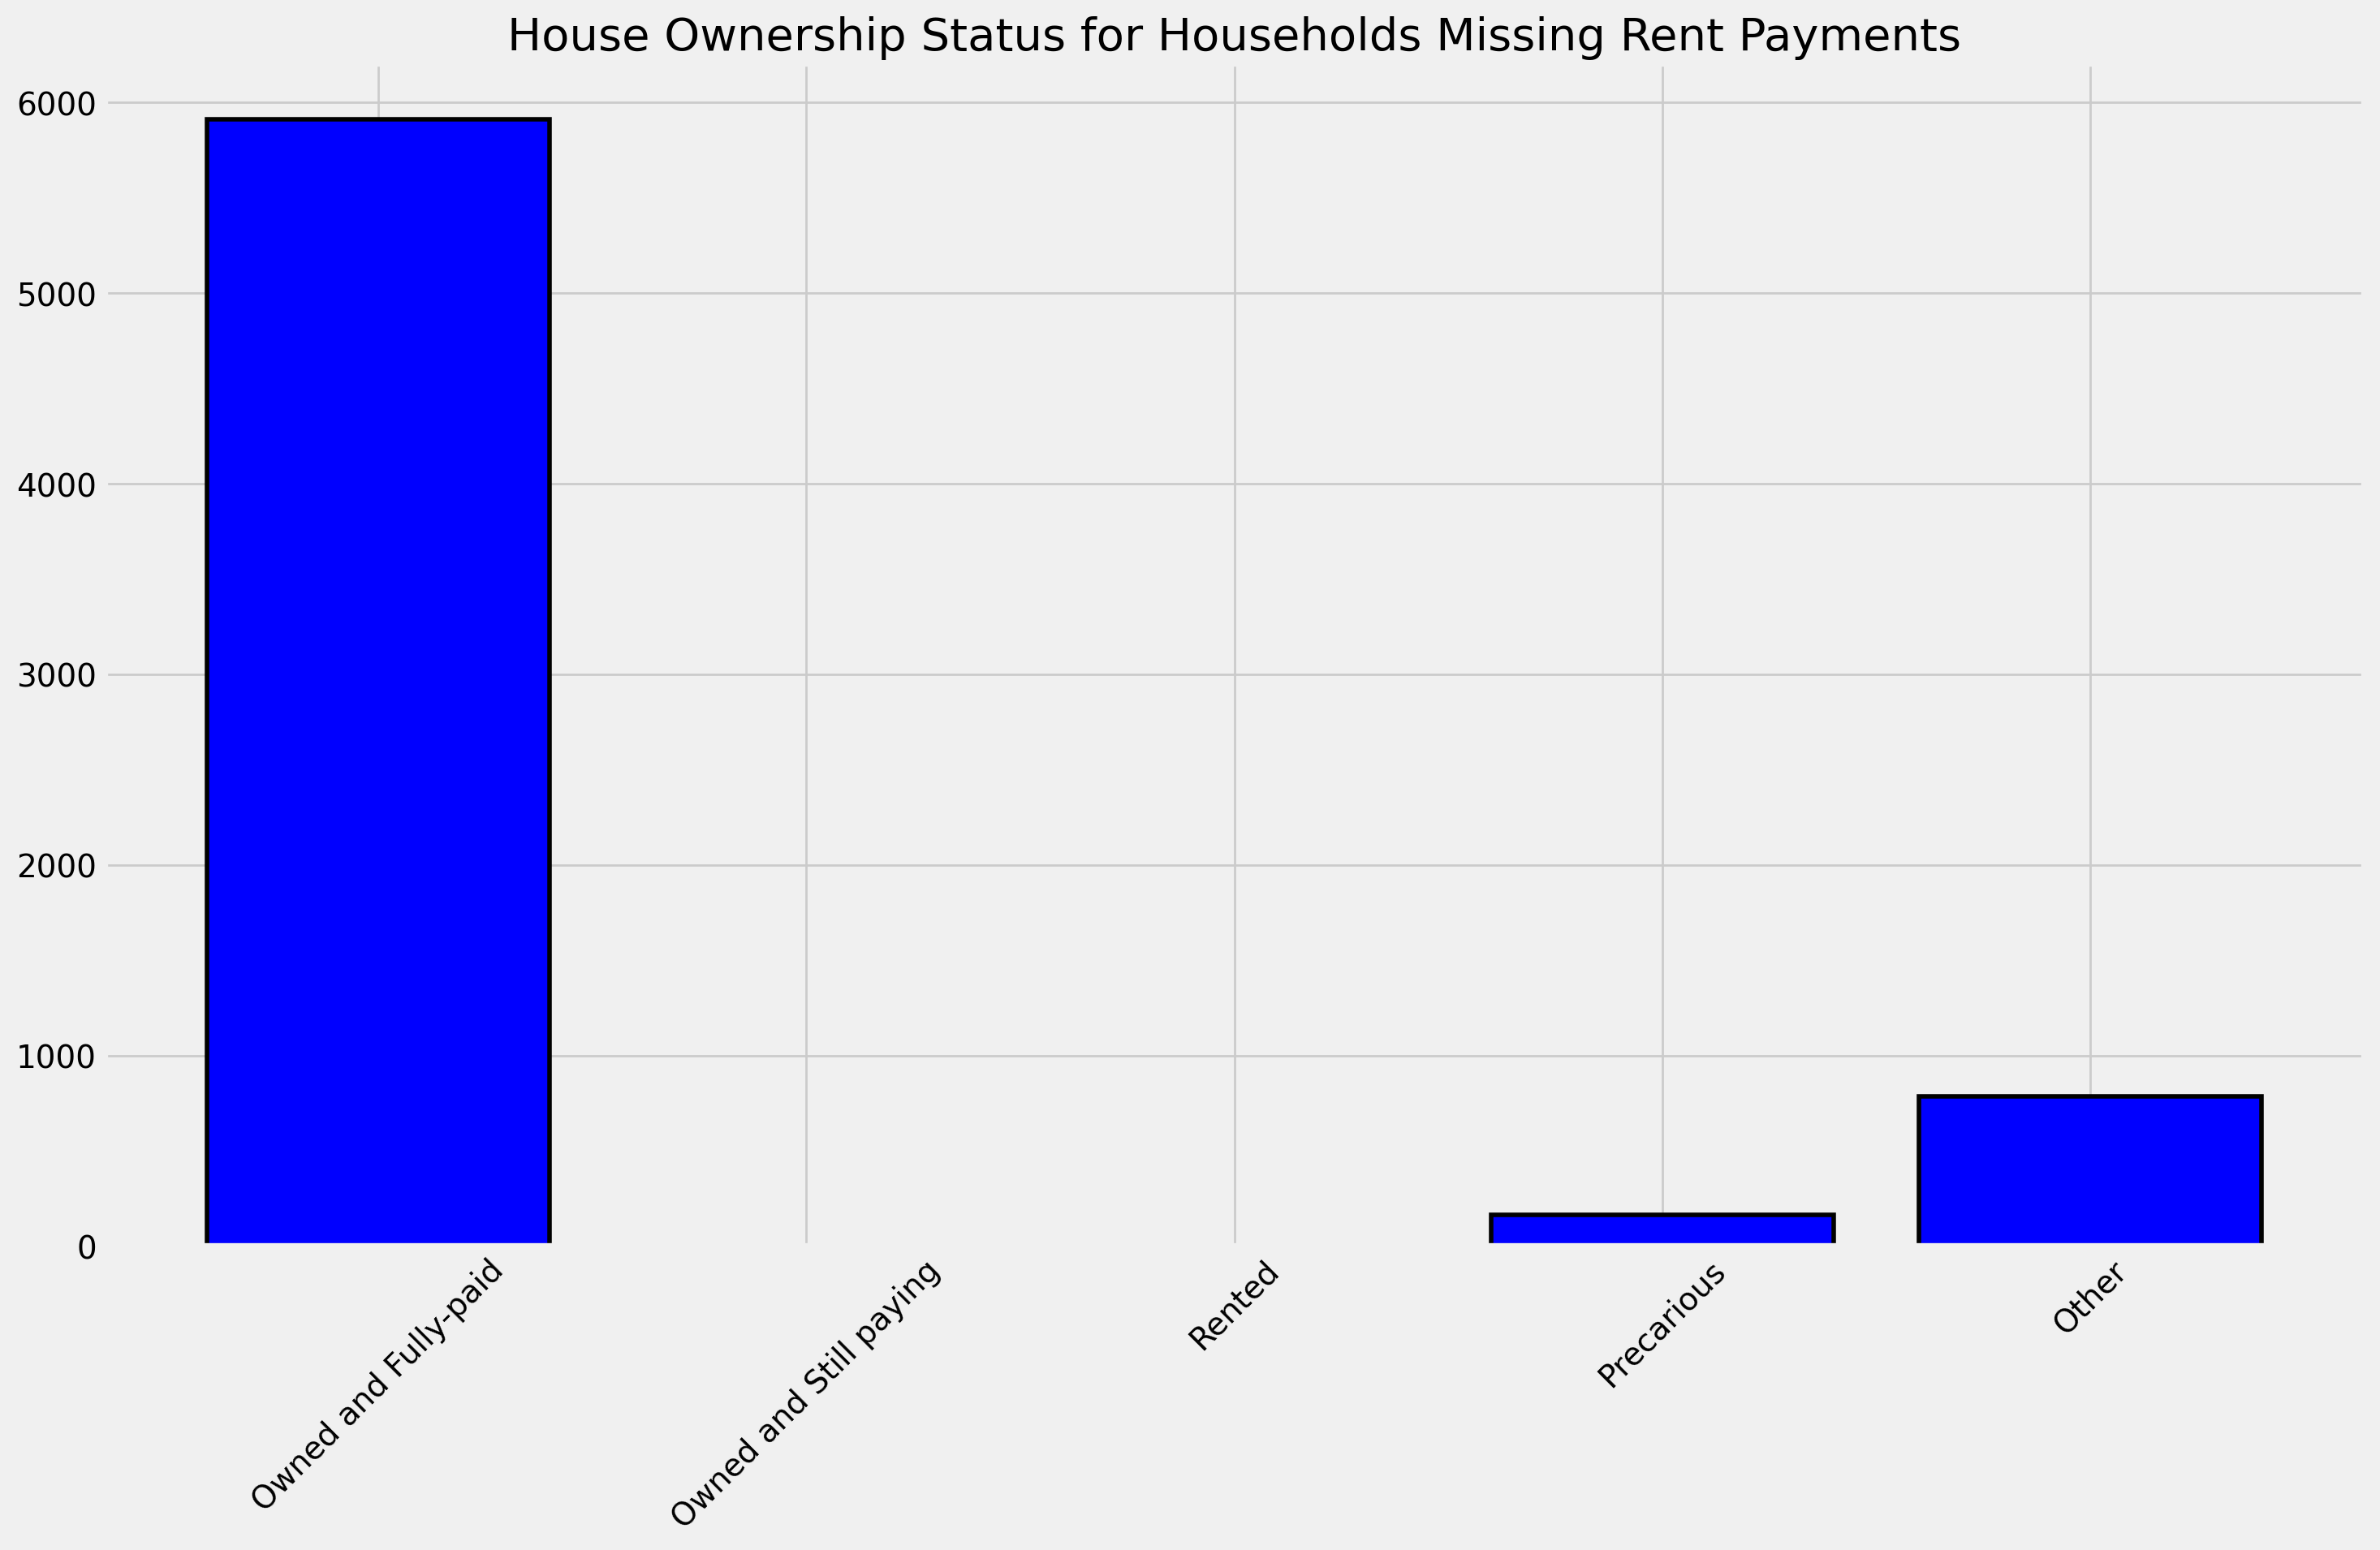

In [17]:
plt.bar(own_variables,df_own.sum(), color = 'blue',
                                             edgecolor = 'k',
                                             linewidth = 2)
plt.title('House Ownership Status for Households Missing Rent Payments')
plt.xticks([0,1,2,3,4],["Owned and Fully-paid","Owned and Still paying","Rented","Precarious","Other"], rotation=45)

plt.show()

### Vast majority of missing rent payments are because the house is fully-owned & paid for. We can therefore safely replace the null values with 0

In [18]:
for df in [df_train, df_test]:
    df["v2a1"].fillna(value=0, inplace=True)
    
df_train['v2a1'].isnull().sum()

0

# -----------------------------

started from the data visualisation part here

# Data Visualisations


# Descriptive Statistics of Train Dataset
- By count of total people in each household
- Dependency rate in each household
- Years of Schooling per individual
- Access to water
- Access to sanitation
- Access to electricity
- Access to basic household amenities

## Count of households by total people in the household

1 - Higher the number of people in the household, the more people to support/primary breadwinner and hence, the higher the need for financial assistance.

In [19]:
max_tamviv = df_train["tamviv"].max()
print(max_tamviv)

15


In [20]:
min_tamviv = df_train["tamviv"].min()
print(min_tamviv)

1


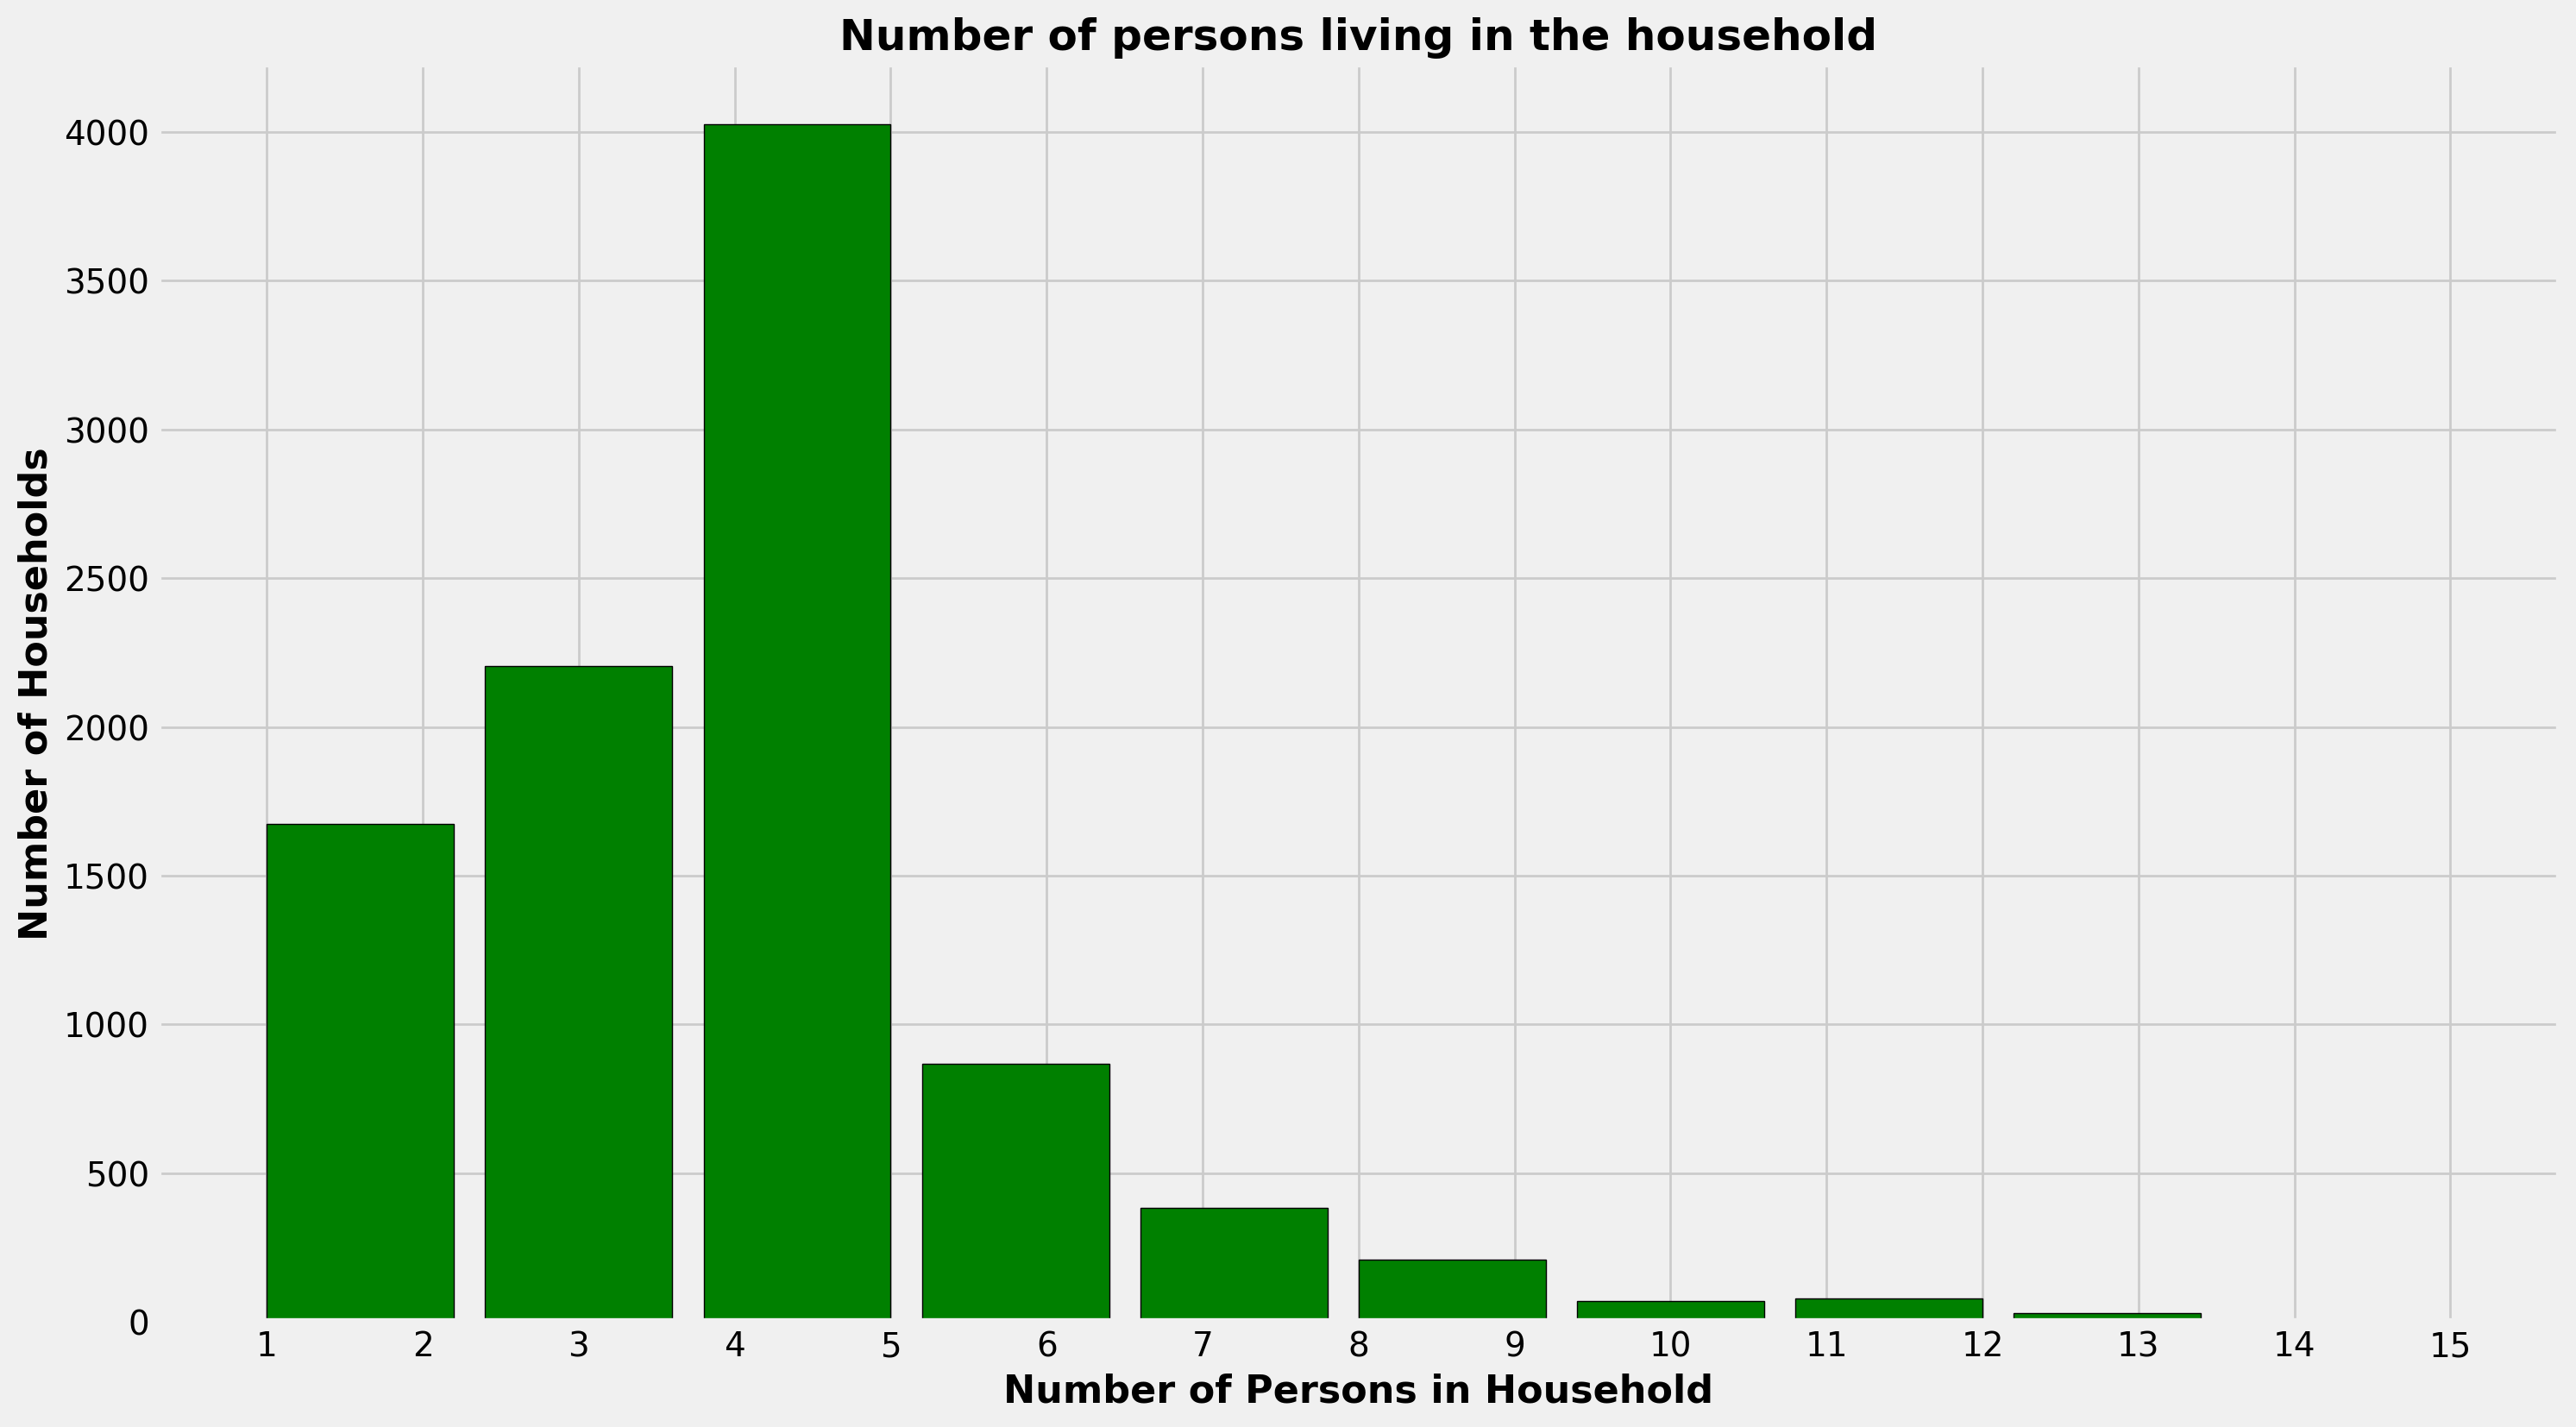

In [21]:
plt.hist(df_train['tamviv'], width=1.2, edgecolor='k', color= 'green')
plt.title('Number of persons living in the household', fontweight='bold', fontsize=18)
plt.xlabel('Number of Persons in Household', fontweight='bold', fontsize=16)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)
plt.xticks((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.show()

## Distribution of Households according to dependency rate

Dependency rate: Higher the dependency rate, lower the earning power of the household. Assumption: People who are 19-64 are the most qualified plus physically able to enter the workforce and contribute meaningfully to the household income.

In [22]:
max_dependency = df_train["dependency"].max()
print("The highest dependency rate for a household is: ", max_dependency)

The highest dependency rate for a household is:  8.0


In [23]:
min_dependency = df_train["dependency"].min()
print("The highest dependency rate for a household is: ", min_dependency)

The highest dependency rate for a household is:  0.0


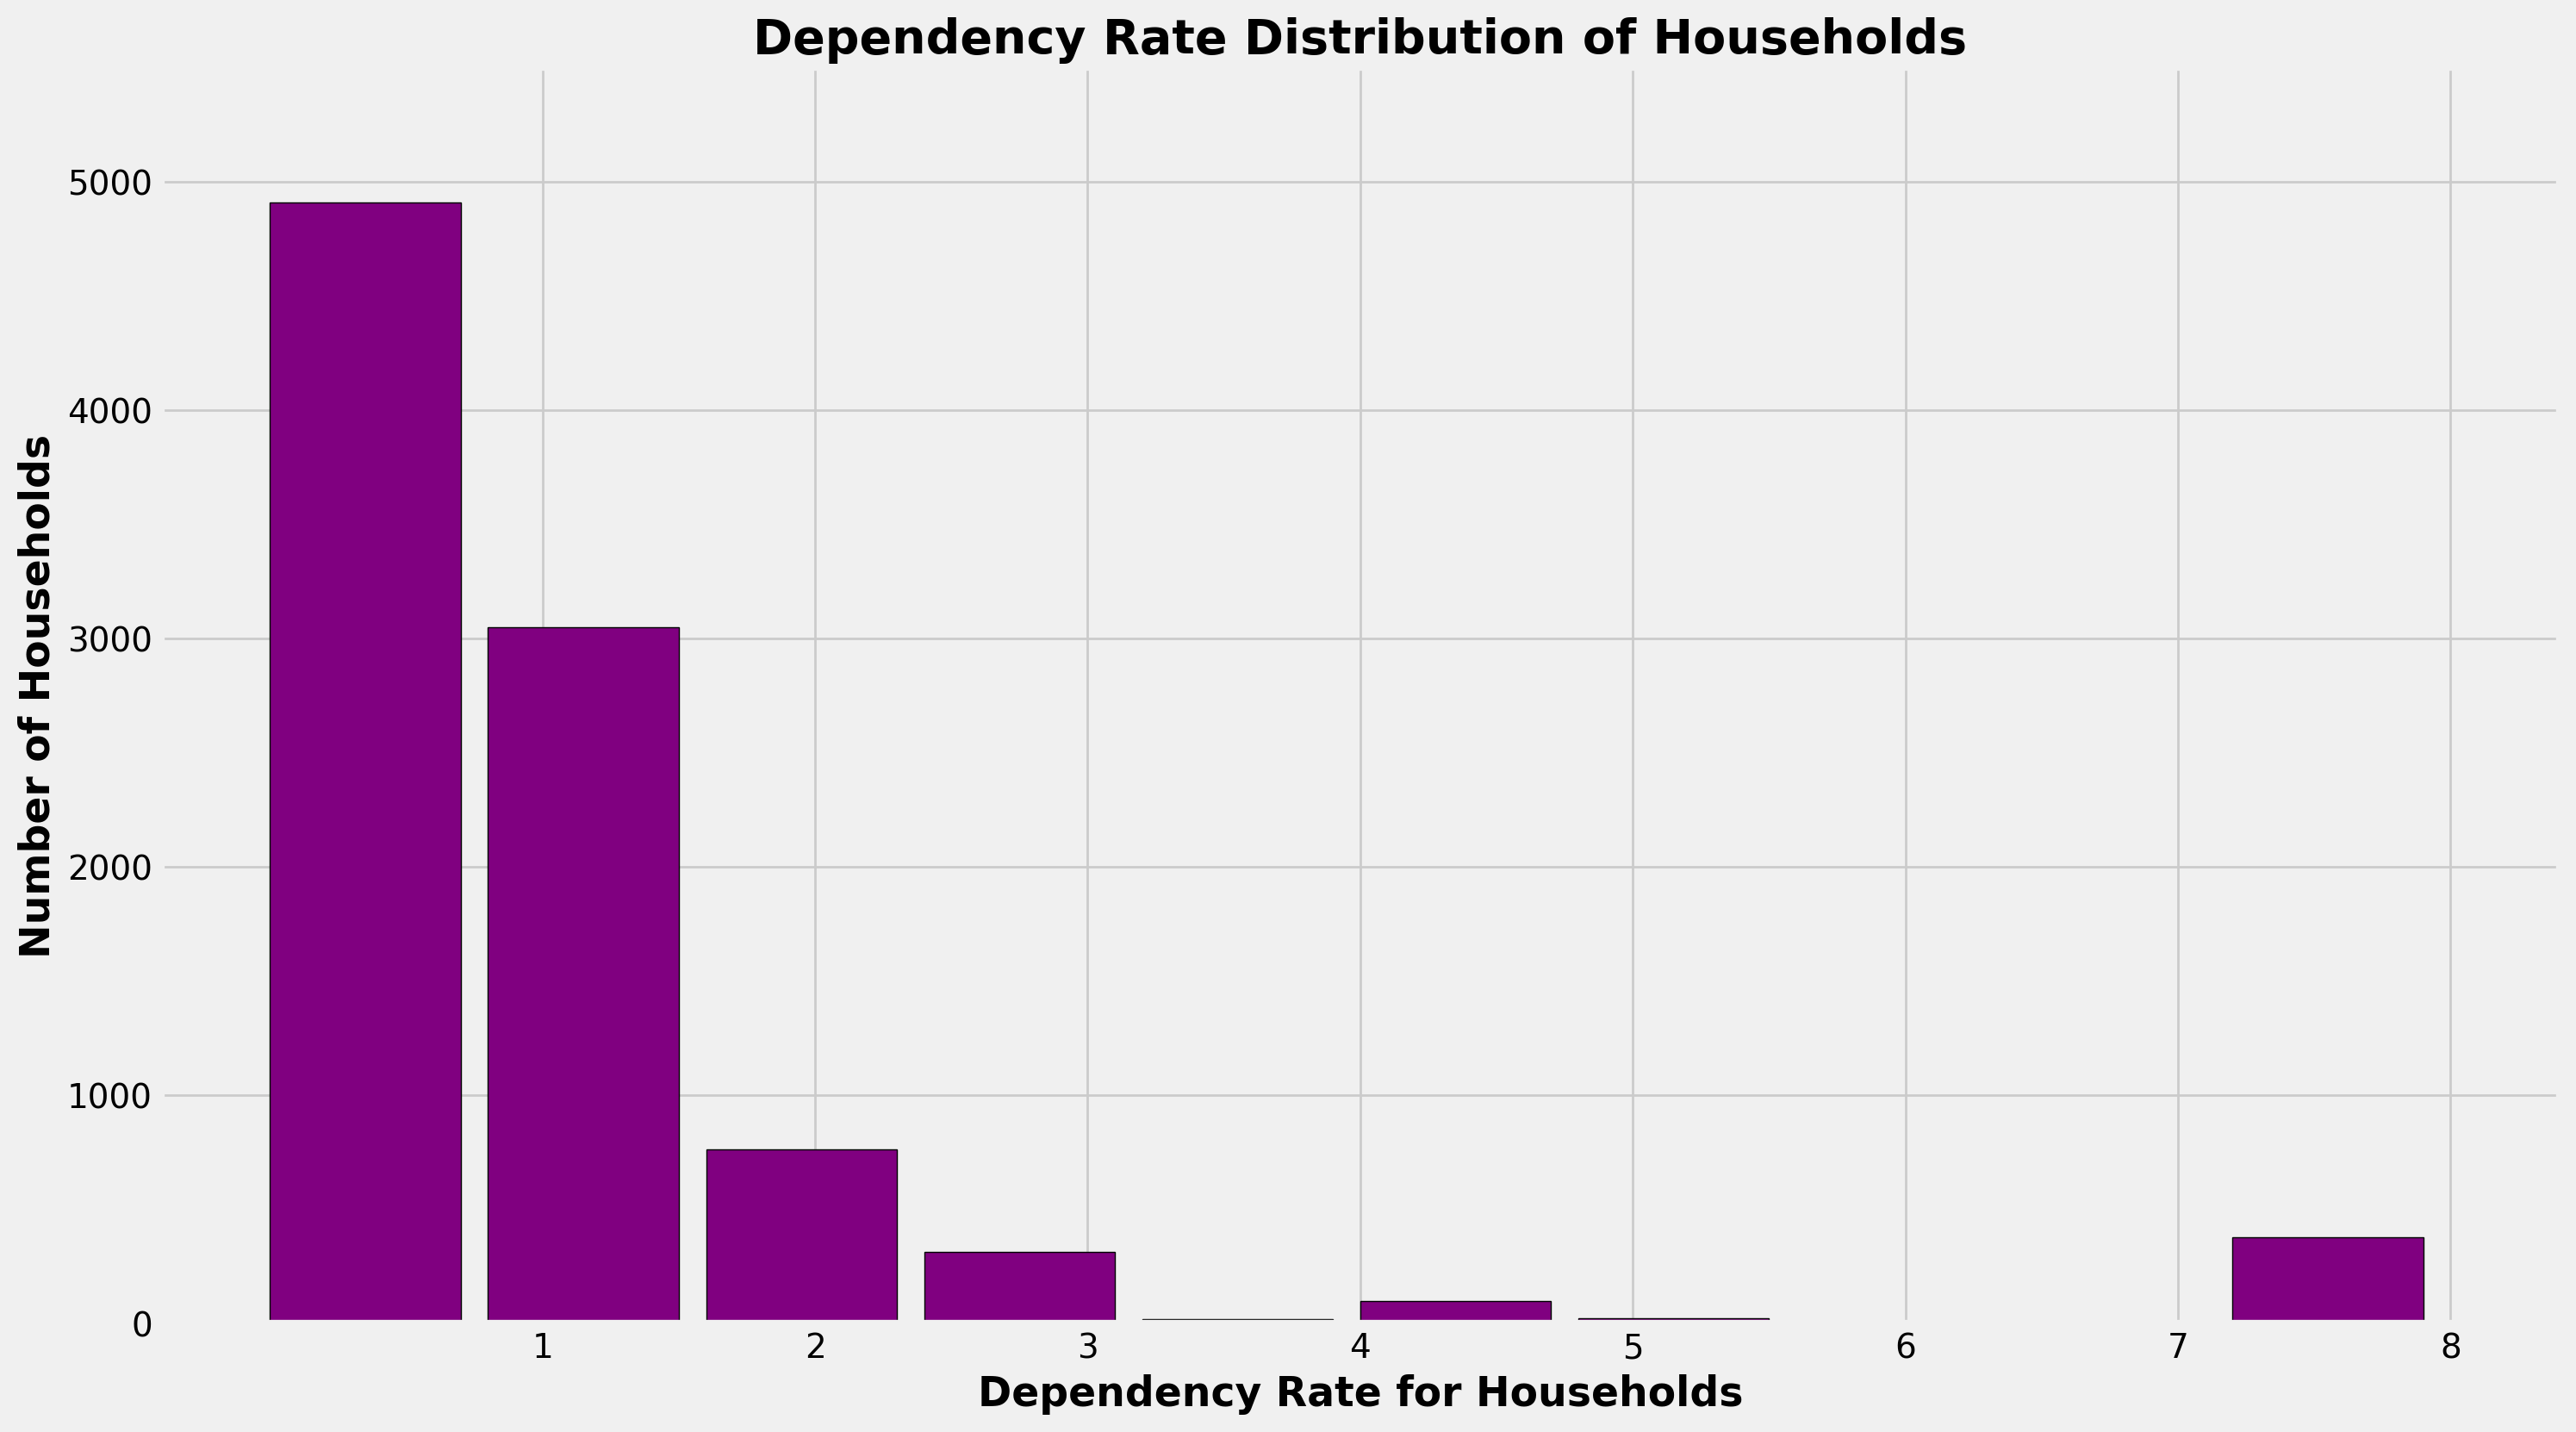

In [24]:
plt.hist(df_train['dependency'], width=0.7, edgecolor='k', color='purple')
plt.title('Dependency Rate Distribution of Households', fontweight='bold', fontsize=20)
plt.xlabel('Dependency Rate for Households', fontweight='bold', fontsize=17)
plt.ylabel('Number of Households', fontweight='bold', fontsize=17)
plt.xticks((1, 2, 3, 4, 5, 6, 7, 8), [1, 2, 3, 4, 5, 6, 7, 8])
plt.ylim(0,5500)
plt.show()

## Distribution of training dataset by Years of Schooling

2 - Level of education [context of South America]

An average person is expected to complete 11-13 years of compulsory education (8 years in prmary school and 3-5 years in secondar/vocational secondary school), before beingequipped with the basic qualifications for entering workforce and earning a living.

Households with fewer than 13 years of schooling are less likely to have a high earning power and therefore require additional financial assistance.

Reference:UNESCO Institute for Statistics ( UIS ). UIS.Stat Bulk Data Download Service. Accessed October 24, 2022. apiportal.uis.unesco.org/bdds.
License : CC BY-4.0  
(website retrieved from: https://data.worldbank.org/indicator/SE.COM.DURS?locations=ZJ)

In [25]:
max_escolari = df_train["escolari"].max()
print(max_escolari)

21


In [26]:
min_escolari = df_train["escolari"].min()
print(min_escolari)

0


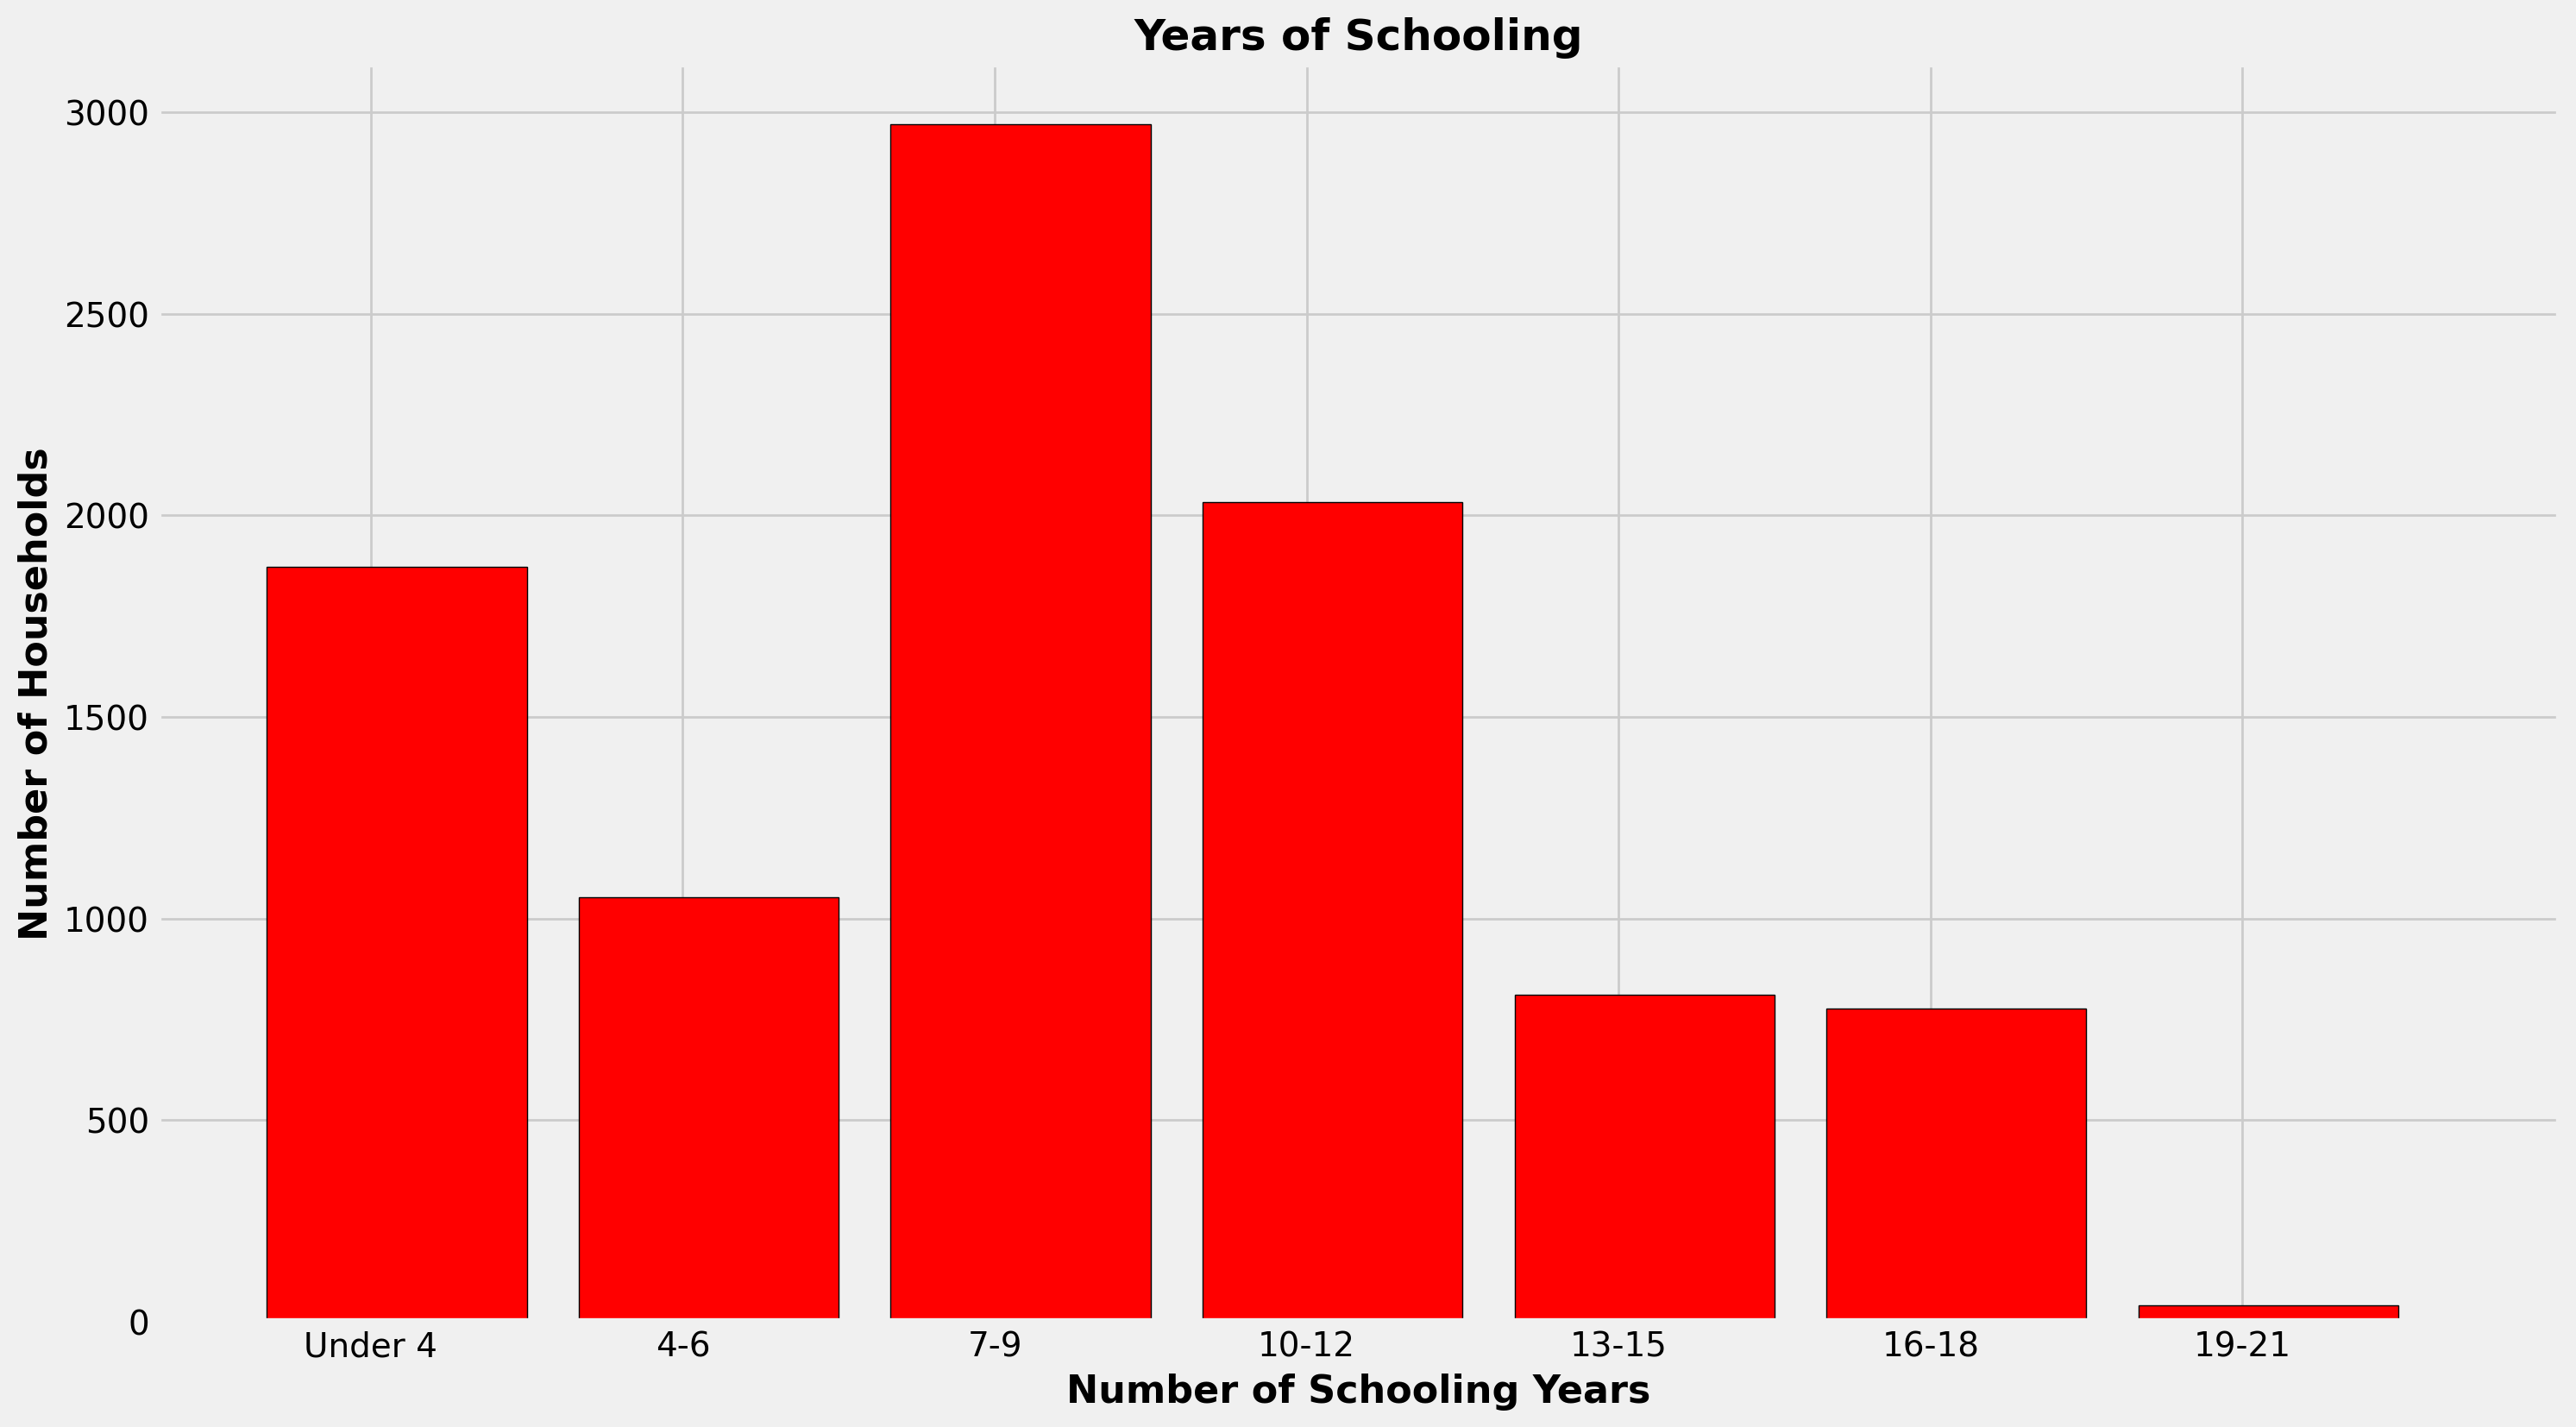

In [27]:
plt.hist(df_train['escolari'], bins=7,  width=2.5, edgecolor='k', color= 'red')
plt.title('Years of Schooling', fontweight='bold', fontsize=18)
plt.xlabel('Number of Schooling Years', fontweight='bold', fontsize=16)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)
plt.xticks((1, 4, 7, 10, 13, 16, 19), ['Under 4', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21'])
plt.show()

## Access to Basic Necessities
- access to water
- access to sanitation
- access to electricity

## Number of Households with Water Provisions

Lack of access to water, which is one of the most basic necessities, signals a pressing need for financial assistance.

Reference: United Nations Human Rights Office of the High Commissioner. (n.d.). International Covenant on Economic, Social and Cultural Rights. Retrieved August 5, 2023, from https://www.ohchr.org/en/instruments-mechanisms/instruments/international-covenant-economic-social-and-cultural-rights#:~:text=punishable%20by%20law.-,Article%2011,continuous%20improvement%20of%20living%20conditions.

In [28]:
abastaguano= df_train['abastaguano']

print(abastaguano)

0       0
1       0
2       0
3       0
4       0
       ..
9552    0
9553    0
9554    0
9555    0
9556    0
Name: abastaguano, Length: 9557, dtype: int64


In [29]:
number_of_1s = df_train['abastaguano'].sum()

# Print the number of 1s
print("The Number of Households without water provisions: ", number_of_1s)

The Number of Households without water provisions:  34


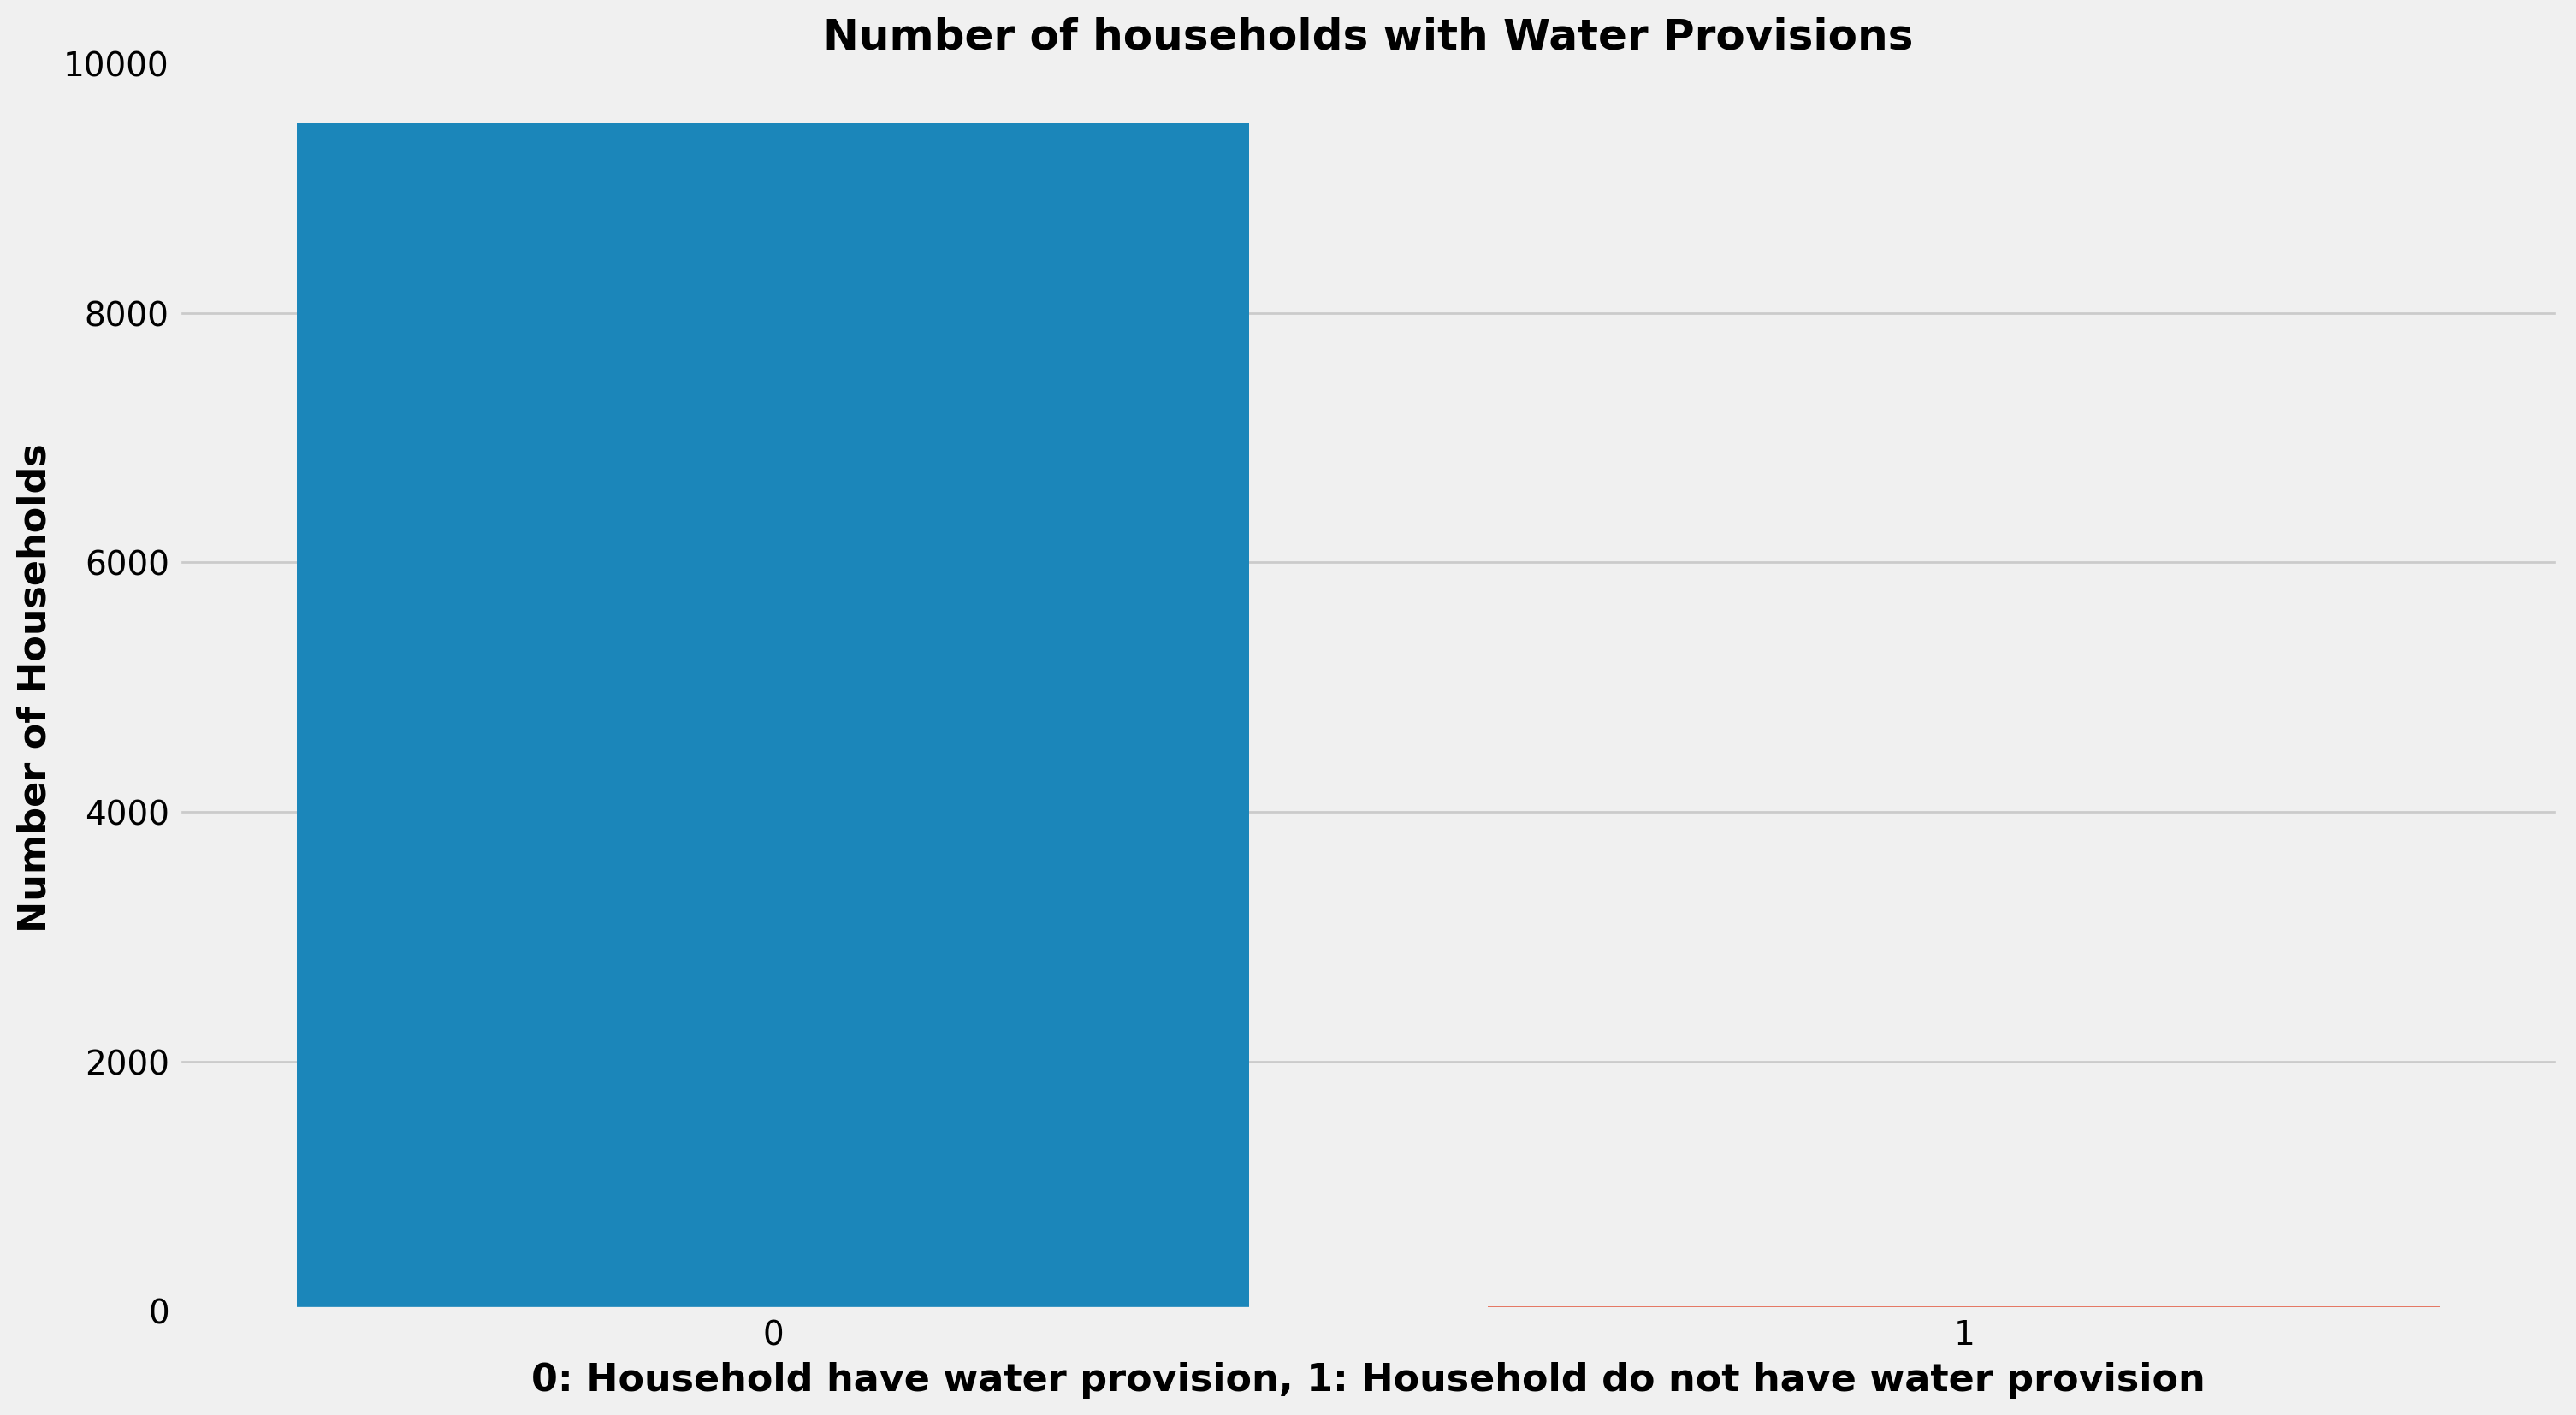

In [30]:
sns.countplot(x='abastaguano', data=df_train)
plt.title('Number of households with Water Provisions', fontweight='bold', fontsize=18)
plt.xlabel('0: Household have water provision, 1: Household do not have water provision', fontweight='bold', fontsize=16)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)
plt.ylim(0, 10000)
plt.show()

## Number of Households with Toilet in their Dwellings

Having ready access to sanitation is a recognized human rights, derived from the right to an adequate standard of living under Article 11(1) of the International Covenant on Economic, Social and Cultural Rights.

Therefore lack of access to sanitation within one's dwelling signals a pressing need for financial assistance.

Reference: United Nations Human Rights Office of the High Commissioner. (n.d.). International Covenant on Economic, Social and Cultural Rights. Retrieved August 5, 2023, from https://www.ohchr.org/en/instruments-mechanisms/instruments/international-covenant-economic-social-and-cultural-rights#:~:text=punishable%20by%20law.-,Article%2011,continuous%20improvement%20of%20living%20conditions.

In [31]:
sanitario1= df_train['sanitario1']

print(sanitario1)

0       0
1       0
2       0
3       0
4       0
       ..
9552    0
9553    0
9554    0
9555    0
9556    0
Name: sanitario1, Length: 9557, dtype: int64


In [32]:
number_of_1s = df_train['sanitario1'].sum()

# Print the number of 1s
print("The Number of Households without toilets: ", number_of_1s)

The Number of Households without toilets:  37


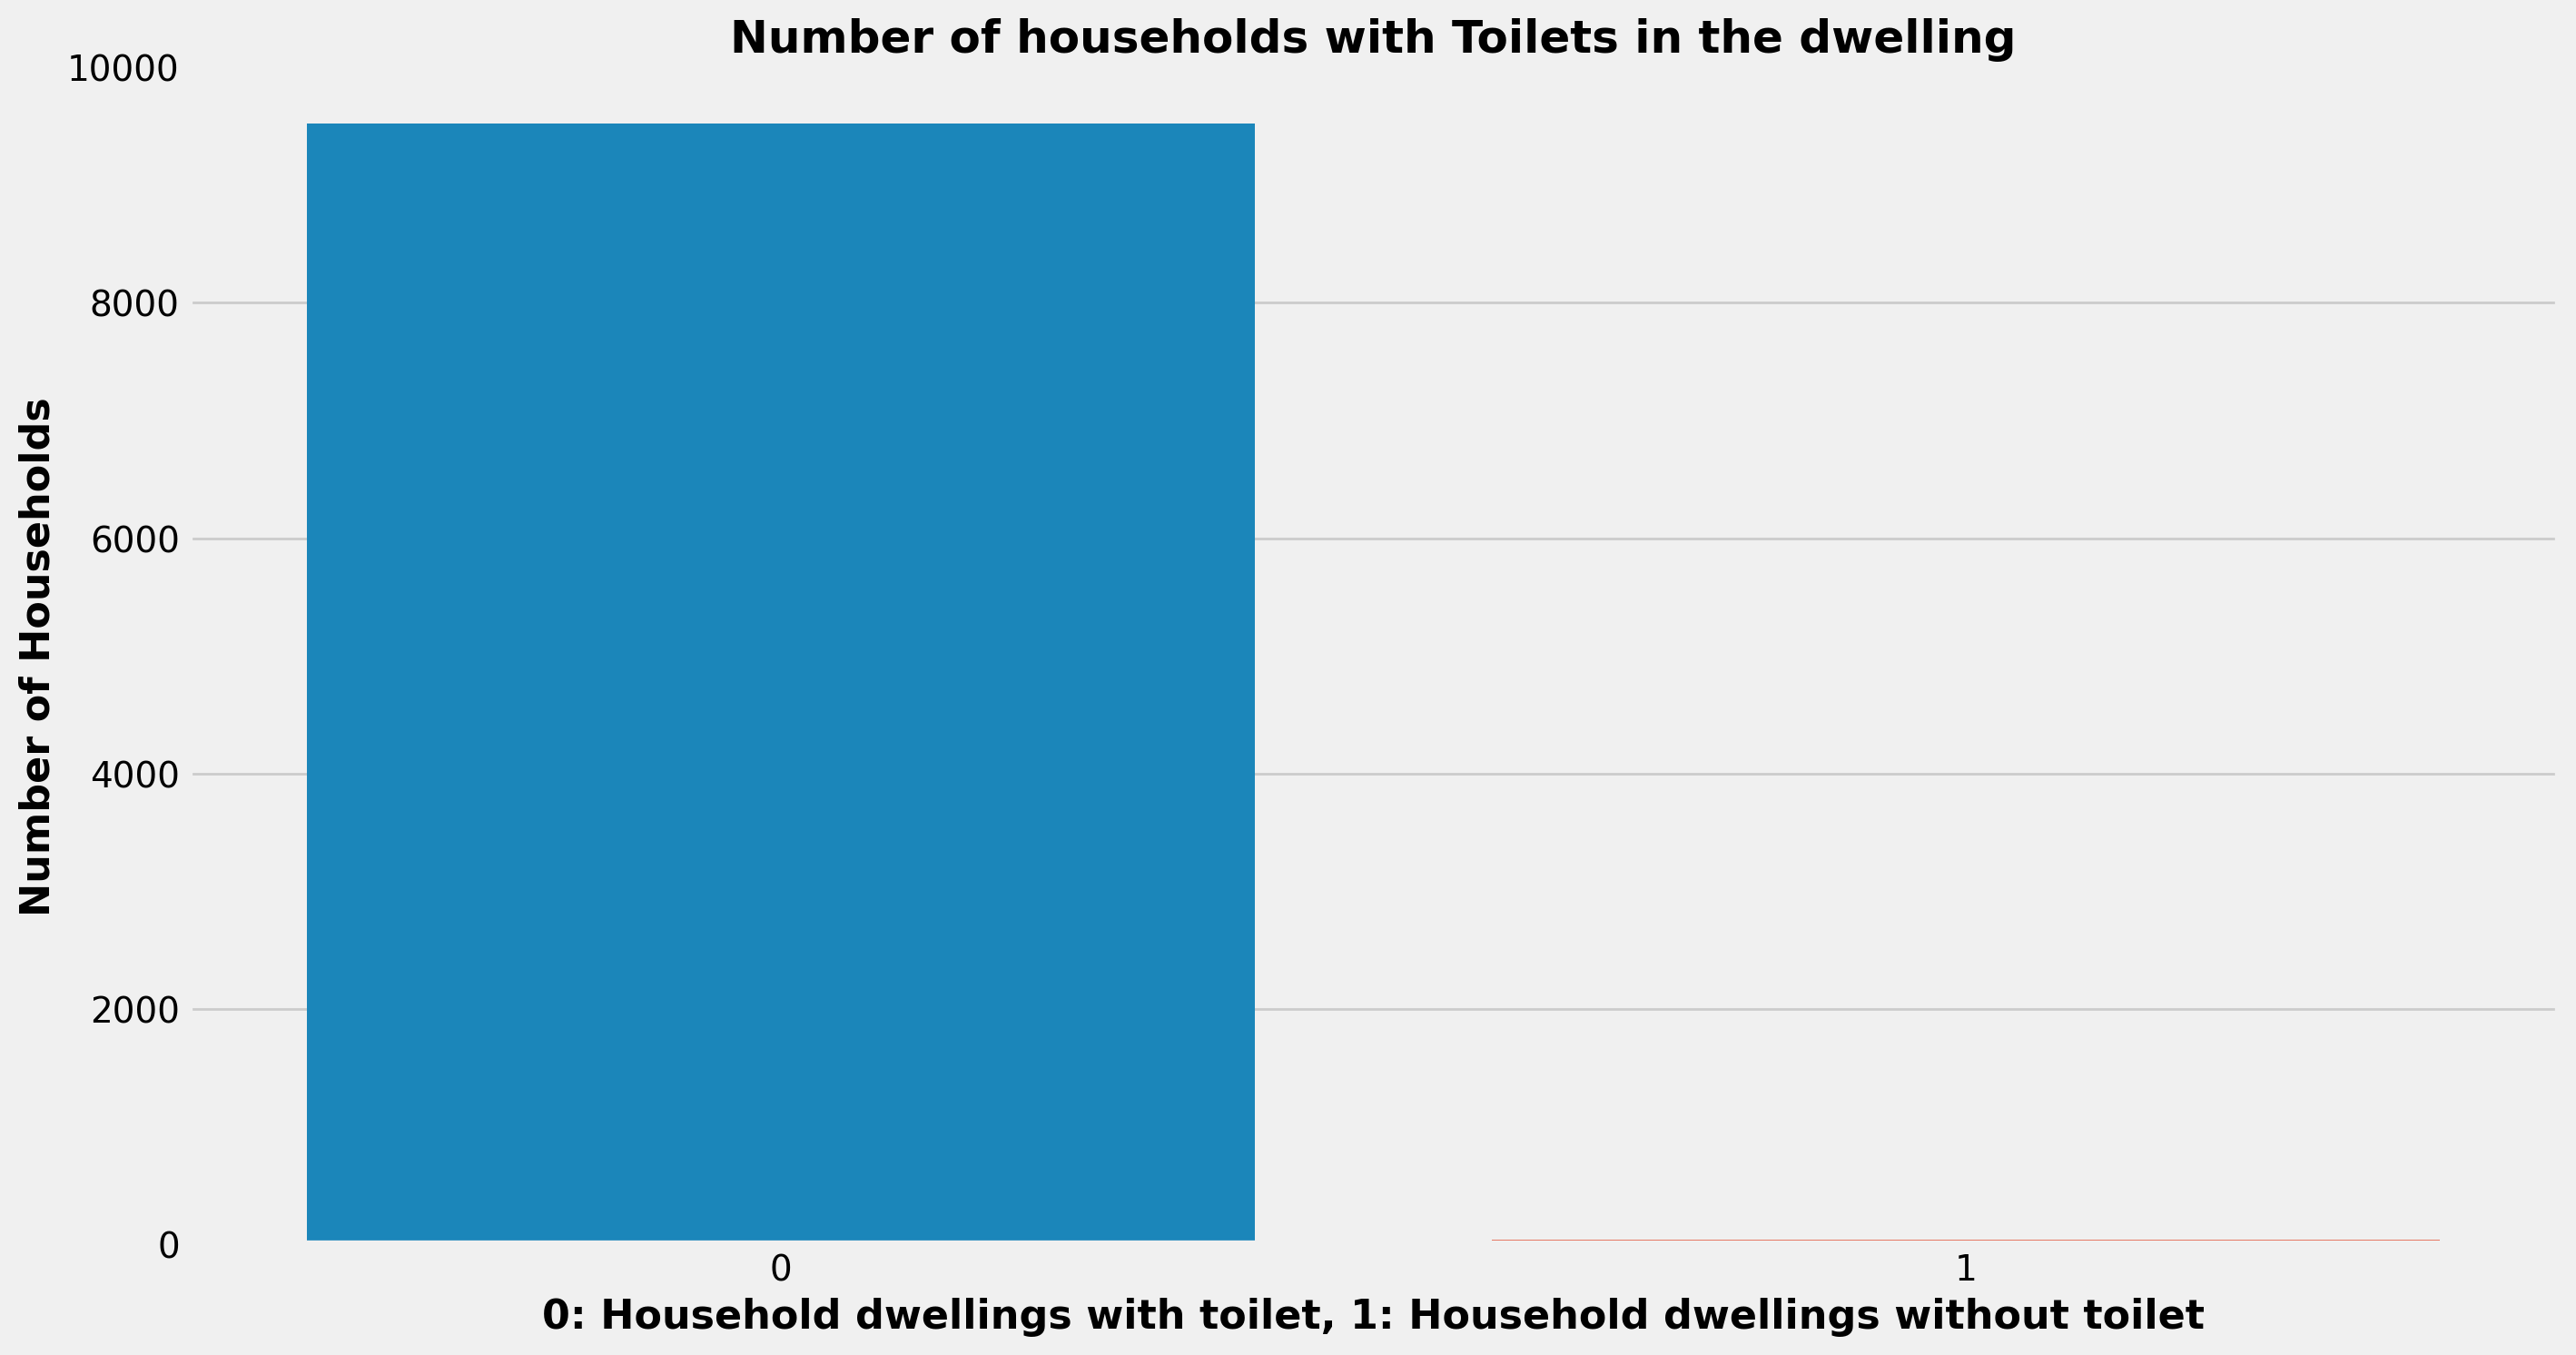

In [33]:
plt.figure(figsize=(15,8))

sns.countplot(x='sanitario1', data=df_train, orient='h')
plt.title('Number of households with Toilets in the dwelling', fontweight='bold', fontsize=18)
plt.xlabel('0: Household dwellings with toilet, 1: Household dwellings without toilet', fontweight='bold', fontsize=16)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)
plt.ylim(0, 10000)
plt.show()

## Number of Households with access to electricity

Electricity is a crucial for poverty alleviation, economic growth and improved living standards. Lacks of access to electricity indicates a need for financial aid.

Reference: Panos, E., Densing, M., Volkart, K. (2016). Access to electricity in the World Energy Council’s global energy scenarios: An outlook for developing regions until 2030. Energy Strategy Reviews, 9, 28-49. Available online.

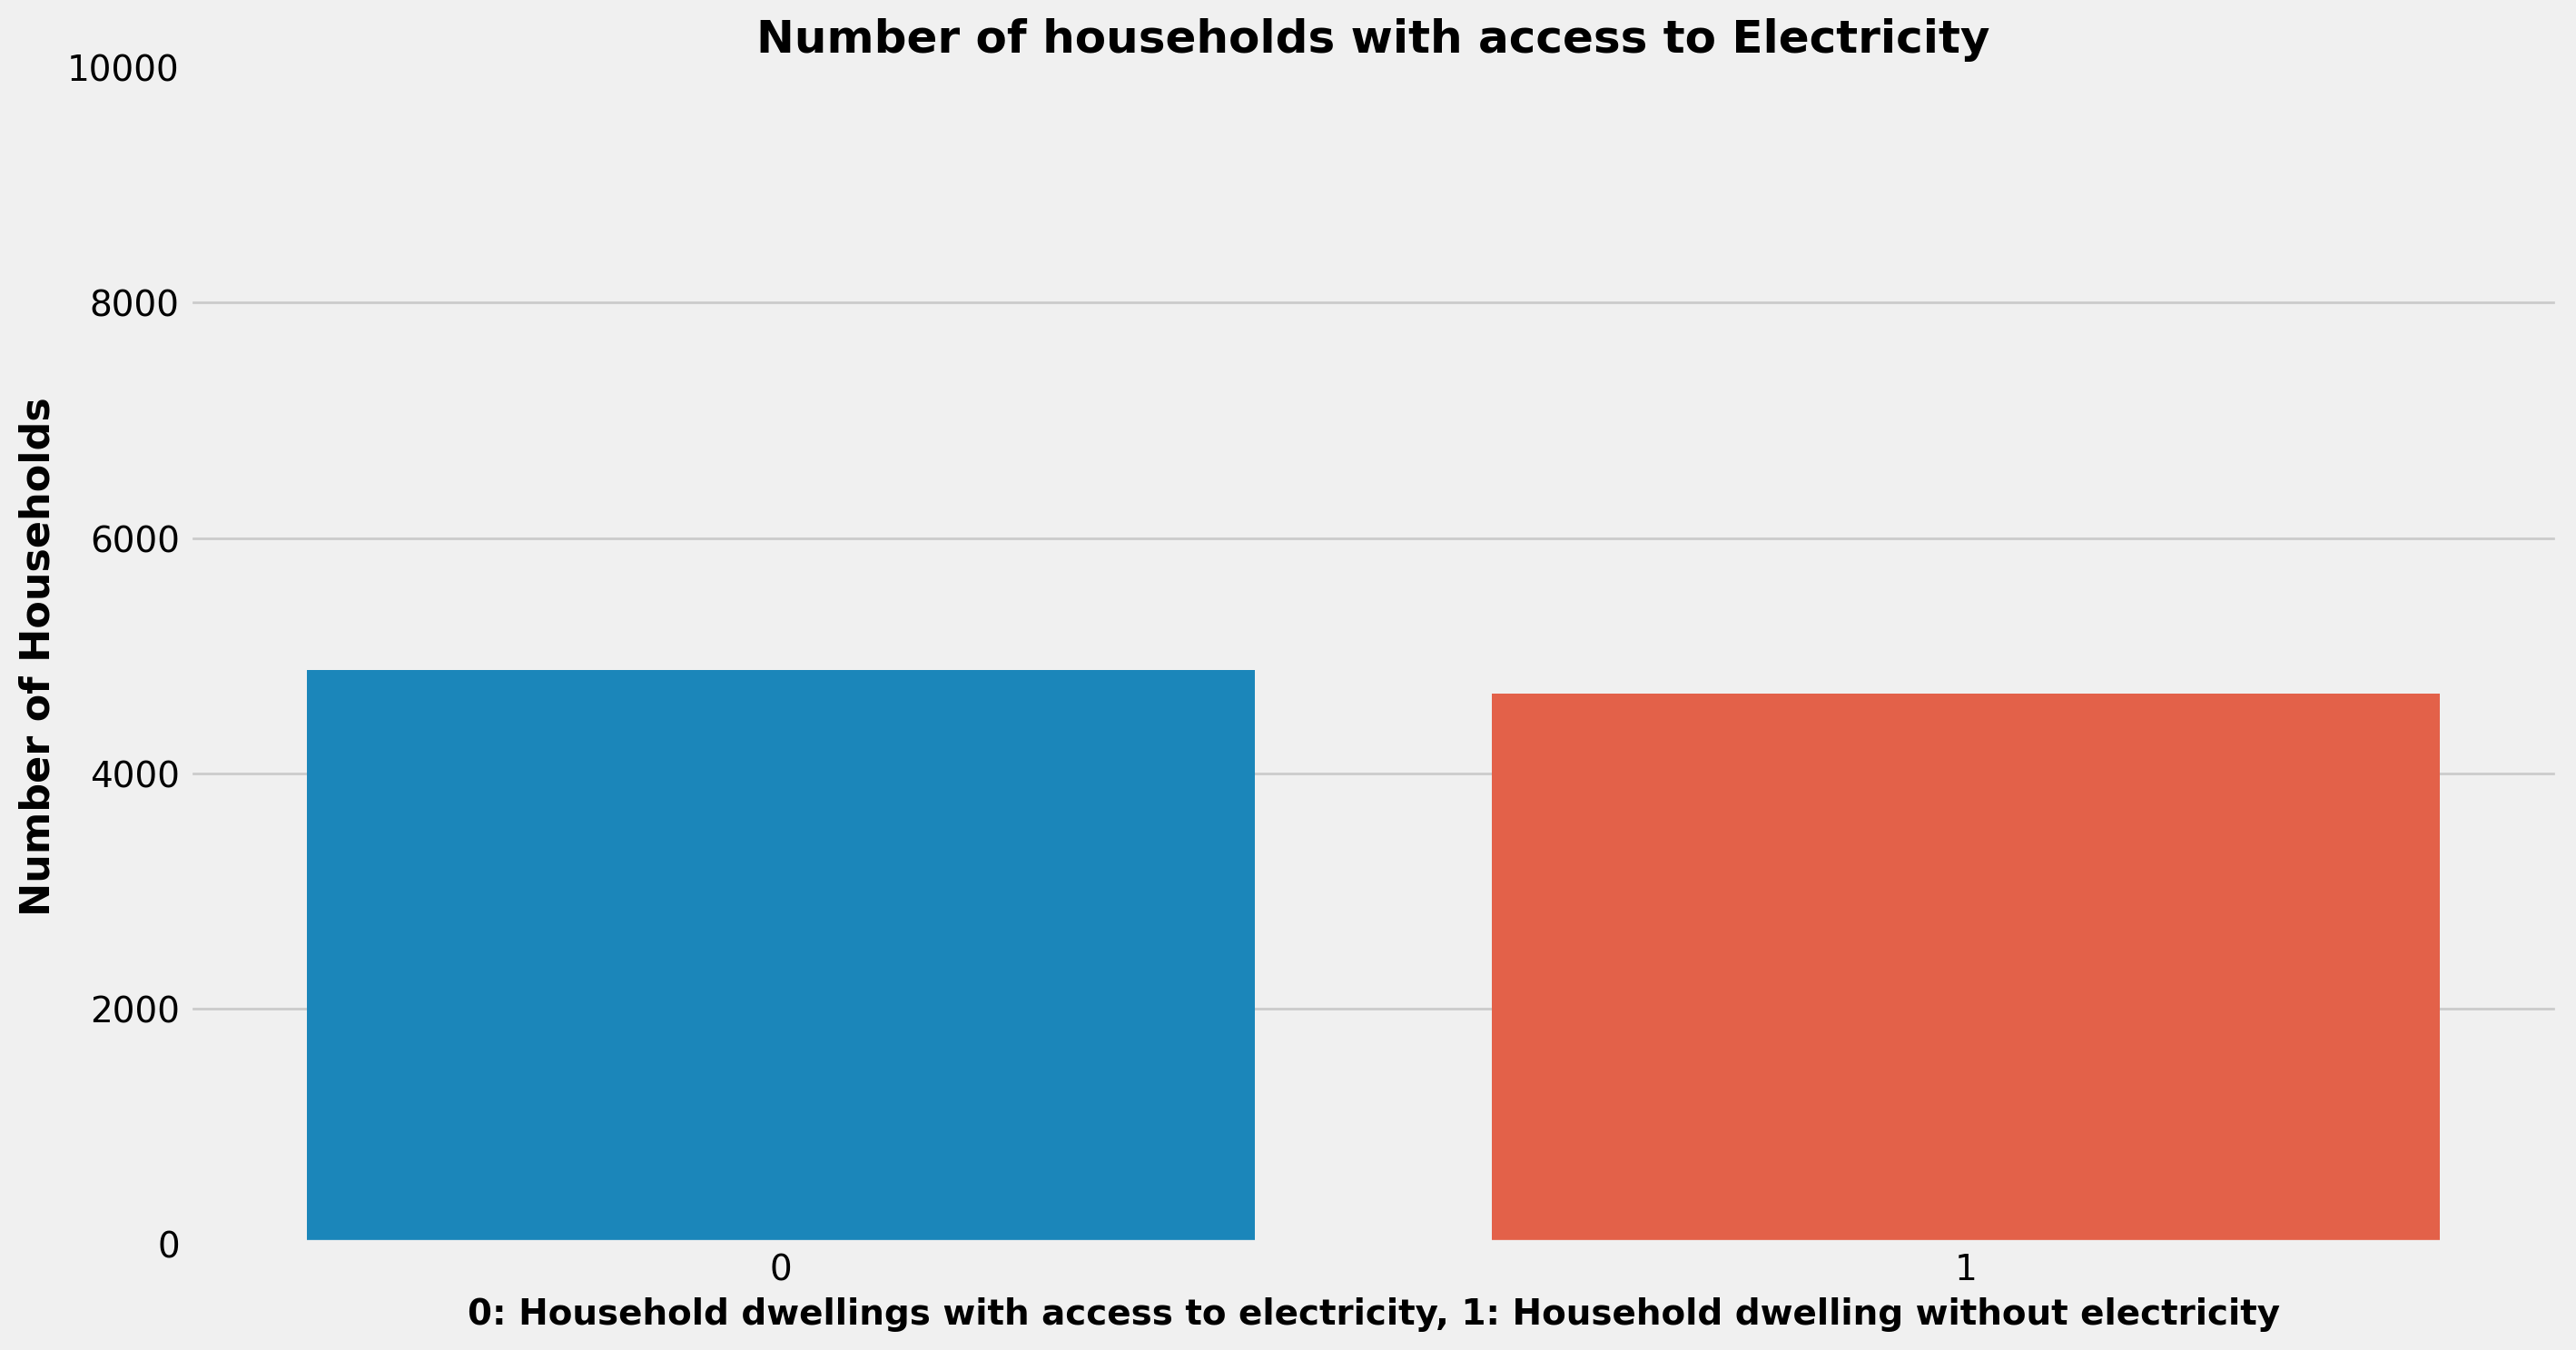

In [34]:
plt.figure(figsize=(15,8))

sns.countplot(x='energcocinar2', data=df_train, orient='h')
plt.title('Number of households with access to Electricity', fontweight='bold', fontsize=18)
plt.xlabel('0: Household dwellings with access to electricity, 1: Household dwelling without electricity', fontweight='bold', fontsize=14)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)
plt.ylim(0, 10000)
plt.show()

## Households with Refrigerator or not (presence of essential, modern amenities)

Testing if the house can afford basic household amenities. Lack of refrigerator suggest a pressing need for financial aid.

Text(0, 0.5, 'Number of Households')

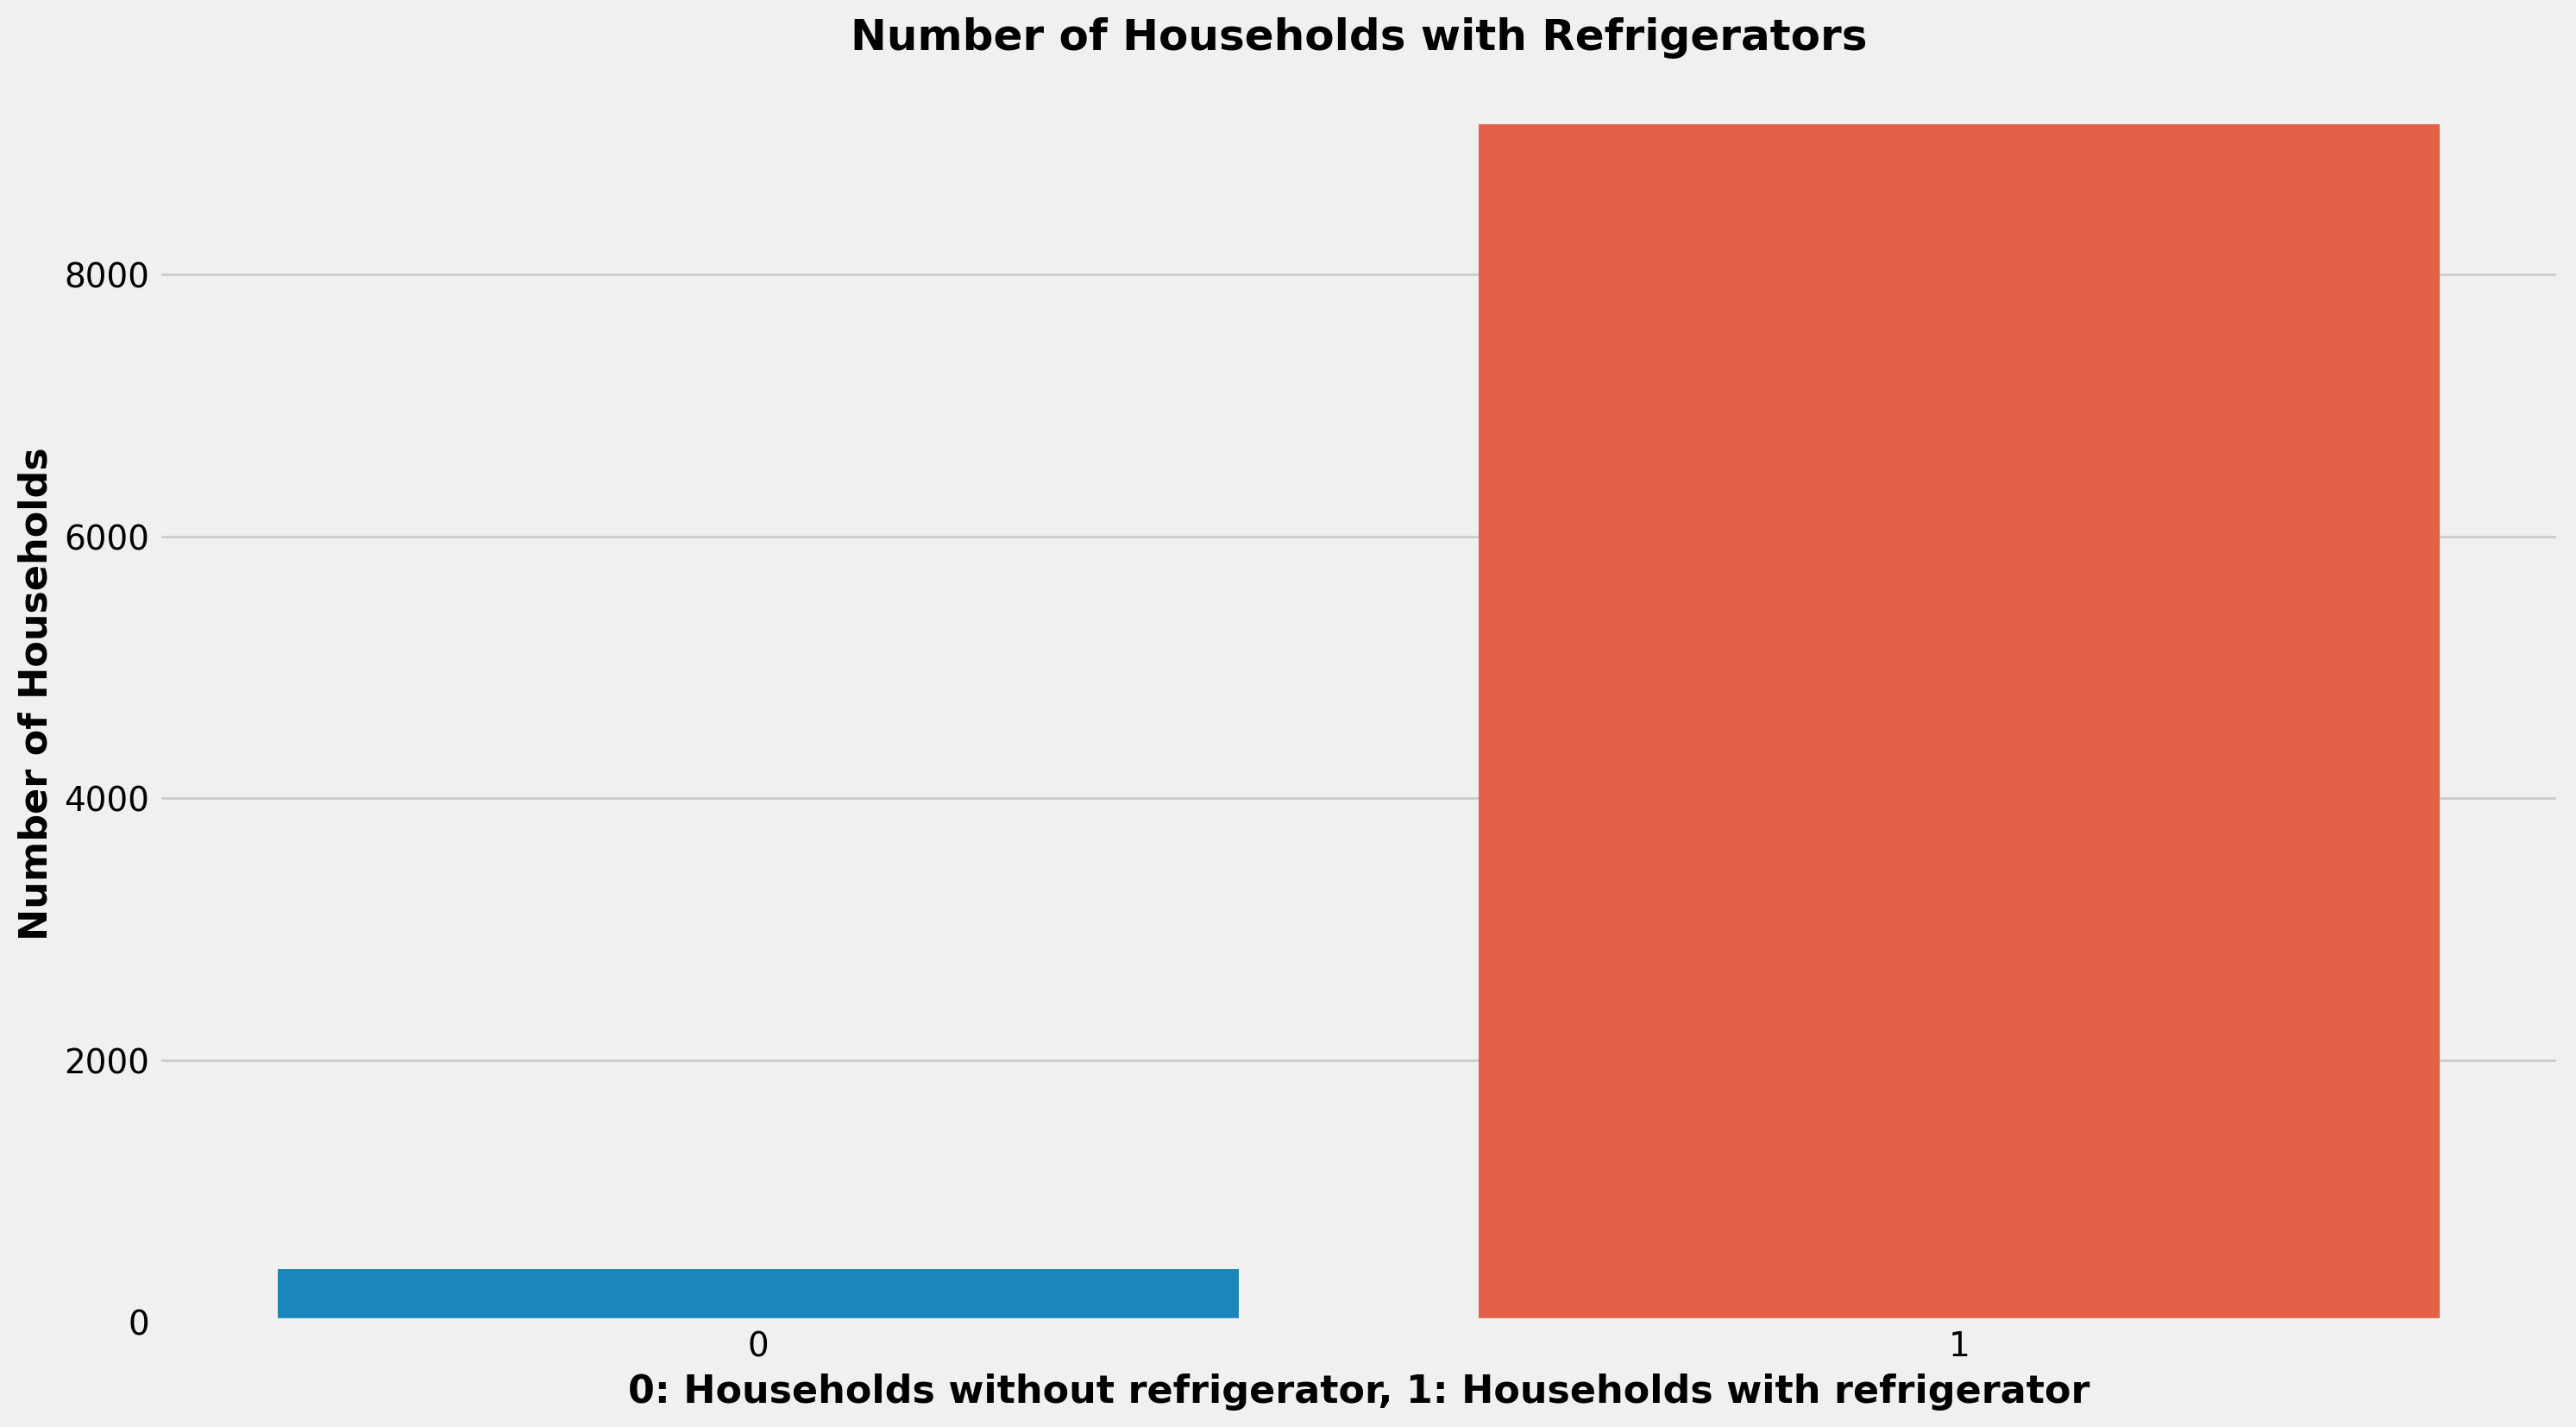

In [35]:
sns.countplot(x='refrig', data=df_train)
plt.title('Number of Households with Refrigerators', fontweight='bold', fontsize=18)
plt.xlabel('0: Households without refrigerator, 1: Households with refrigerator', fontweight='bold', fontsize=16)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)

## Annex
- number of households with Disabled people
- number of Children age 0-19 Distribution of Households
- Distribution of Number of Adults in Households
- Distribution of Households according to Number of Rooms in their Dwellings
- Count of households by total males in the household
- Count of households by total females in the household
- Distribution of Households according to years of education of male head of household
- Distribution of Households according to years of education of female head of household

## Number of Households with Disabled Persons

In [36]:
dis= df_train['dis']

print(dis)

0       0
1       0
2       1
3       0
4       0
       ..
9552    0
9553    0
9554    0
9555    0
9556    0
Name: dis, Length: 9557, dtype: int64


In [37]:
number_of_1s = df_train['dis'].sum()

# Print the number of 1s
print("The Number of Households with disabled person(s): ", number_of_1s)

The Number of Households with disabled person(s):  550


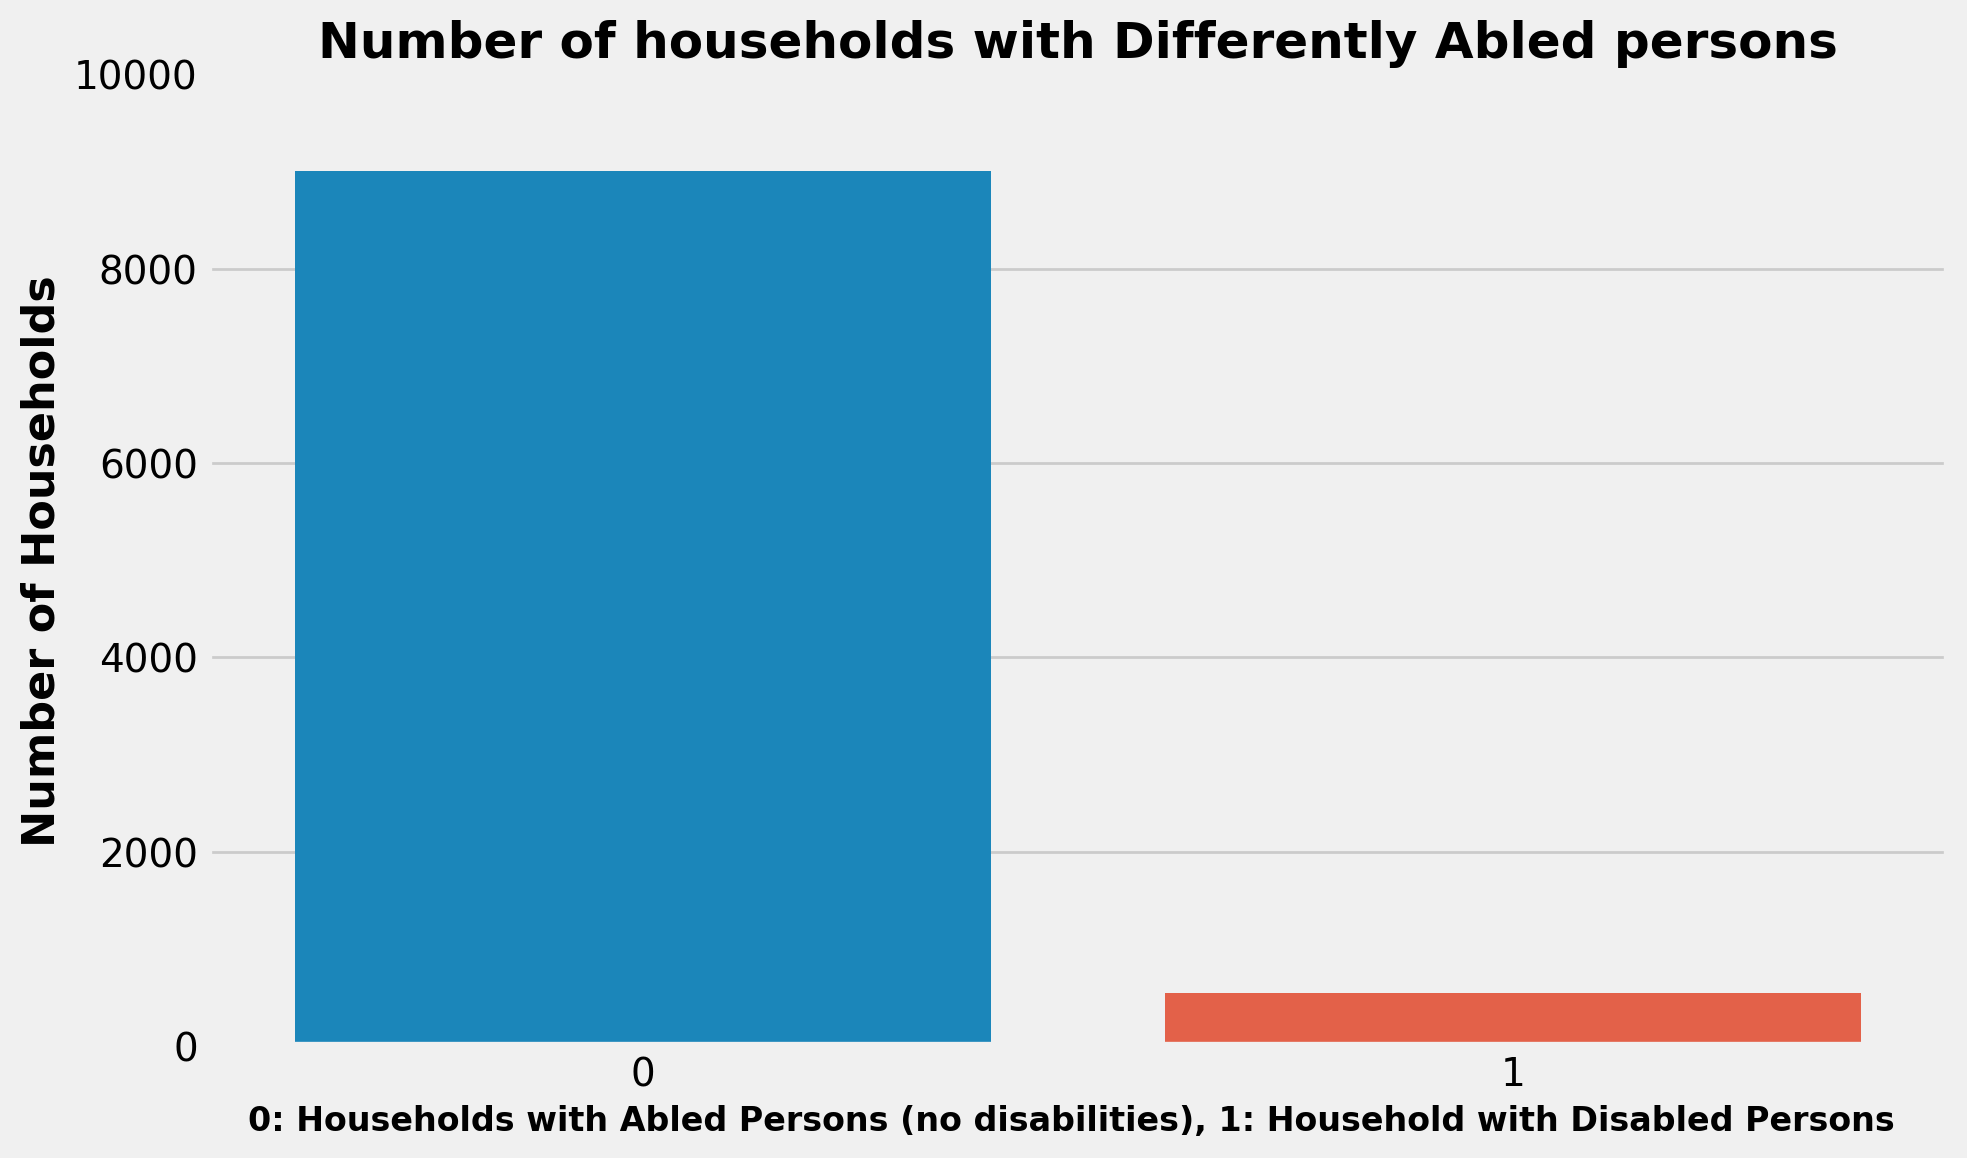

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='dis', data=df_train)
plt.title('Number of households with Differently Abled persons', fontweight='bold', fontsize=18)
plt.xlabel('0: Households with Abled Persons (no disabilities), 1: Household with Disabled Persons ', fontweight='bold', fontsize=12)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)
plt.ylim(0, 10000)
plt.show()

## Number of Children age 0-19 Distribution of Households¶

In [39]:
hogar_nin= df_train['hogar_nin']

print(hogar_nin)

0       0
1       0
2       0
3       2
4       2
       ..
9552    1
9553    1
9554    1
9555    1
9556    1
Name: hogar_nin, Length: 9557, dtype: int64


In [40]:
max_hogar_nin = df_train["hogar_nin"].max()
print("The most number of childrens in a household is: ", max_hogar_nin)

The most number of childrens in a household is:  9


In [41]:
min_hogar_nin = df_train["hogar_nin"].min()
print("The least number of childrens in a household is: ", min_hogar_nin)

The least number of childrens in a household is:  0


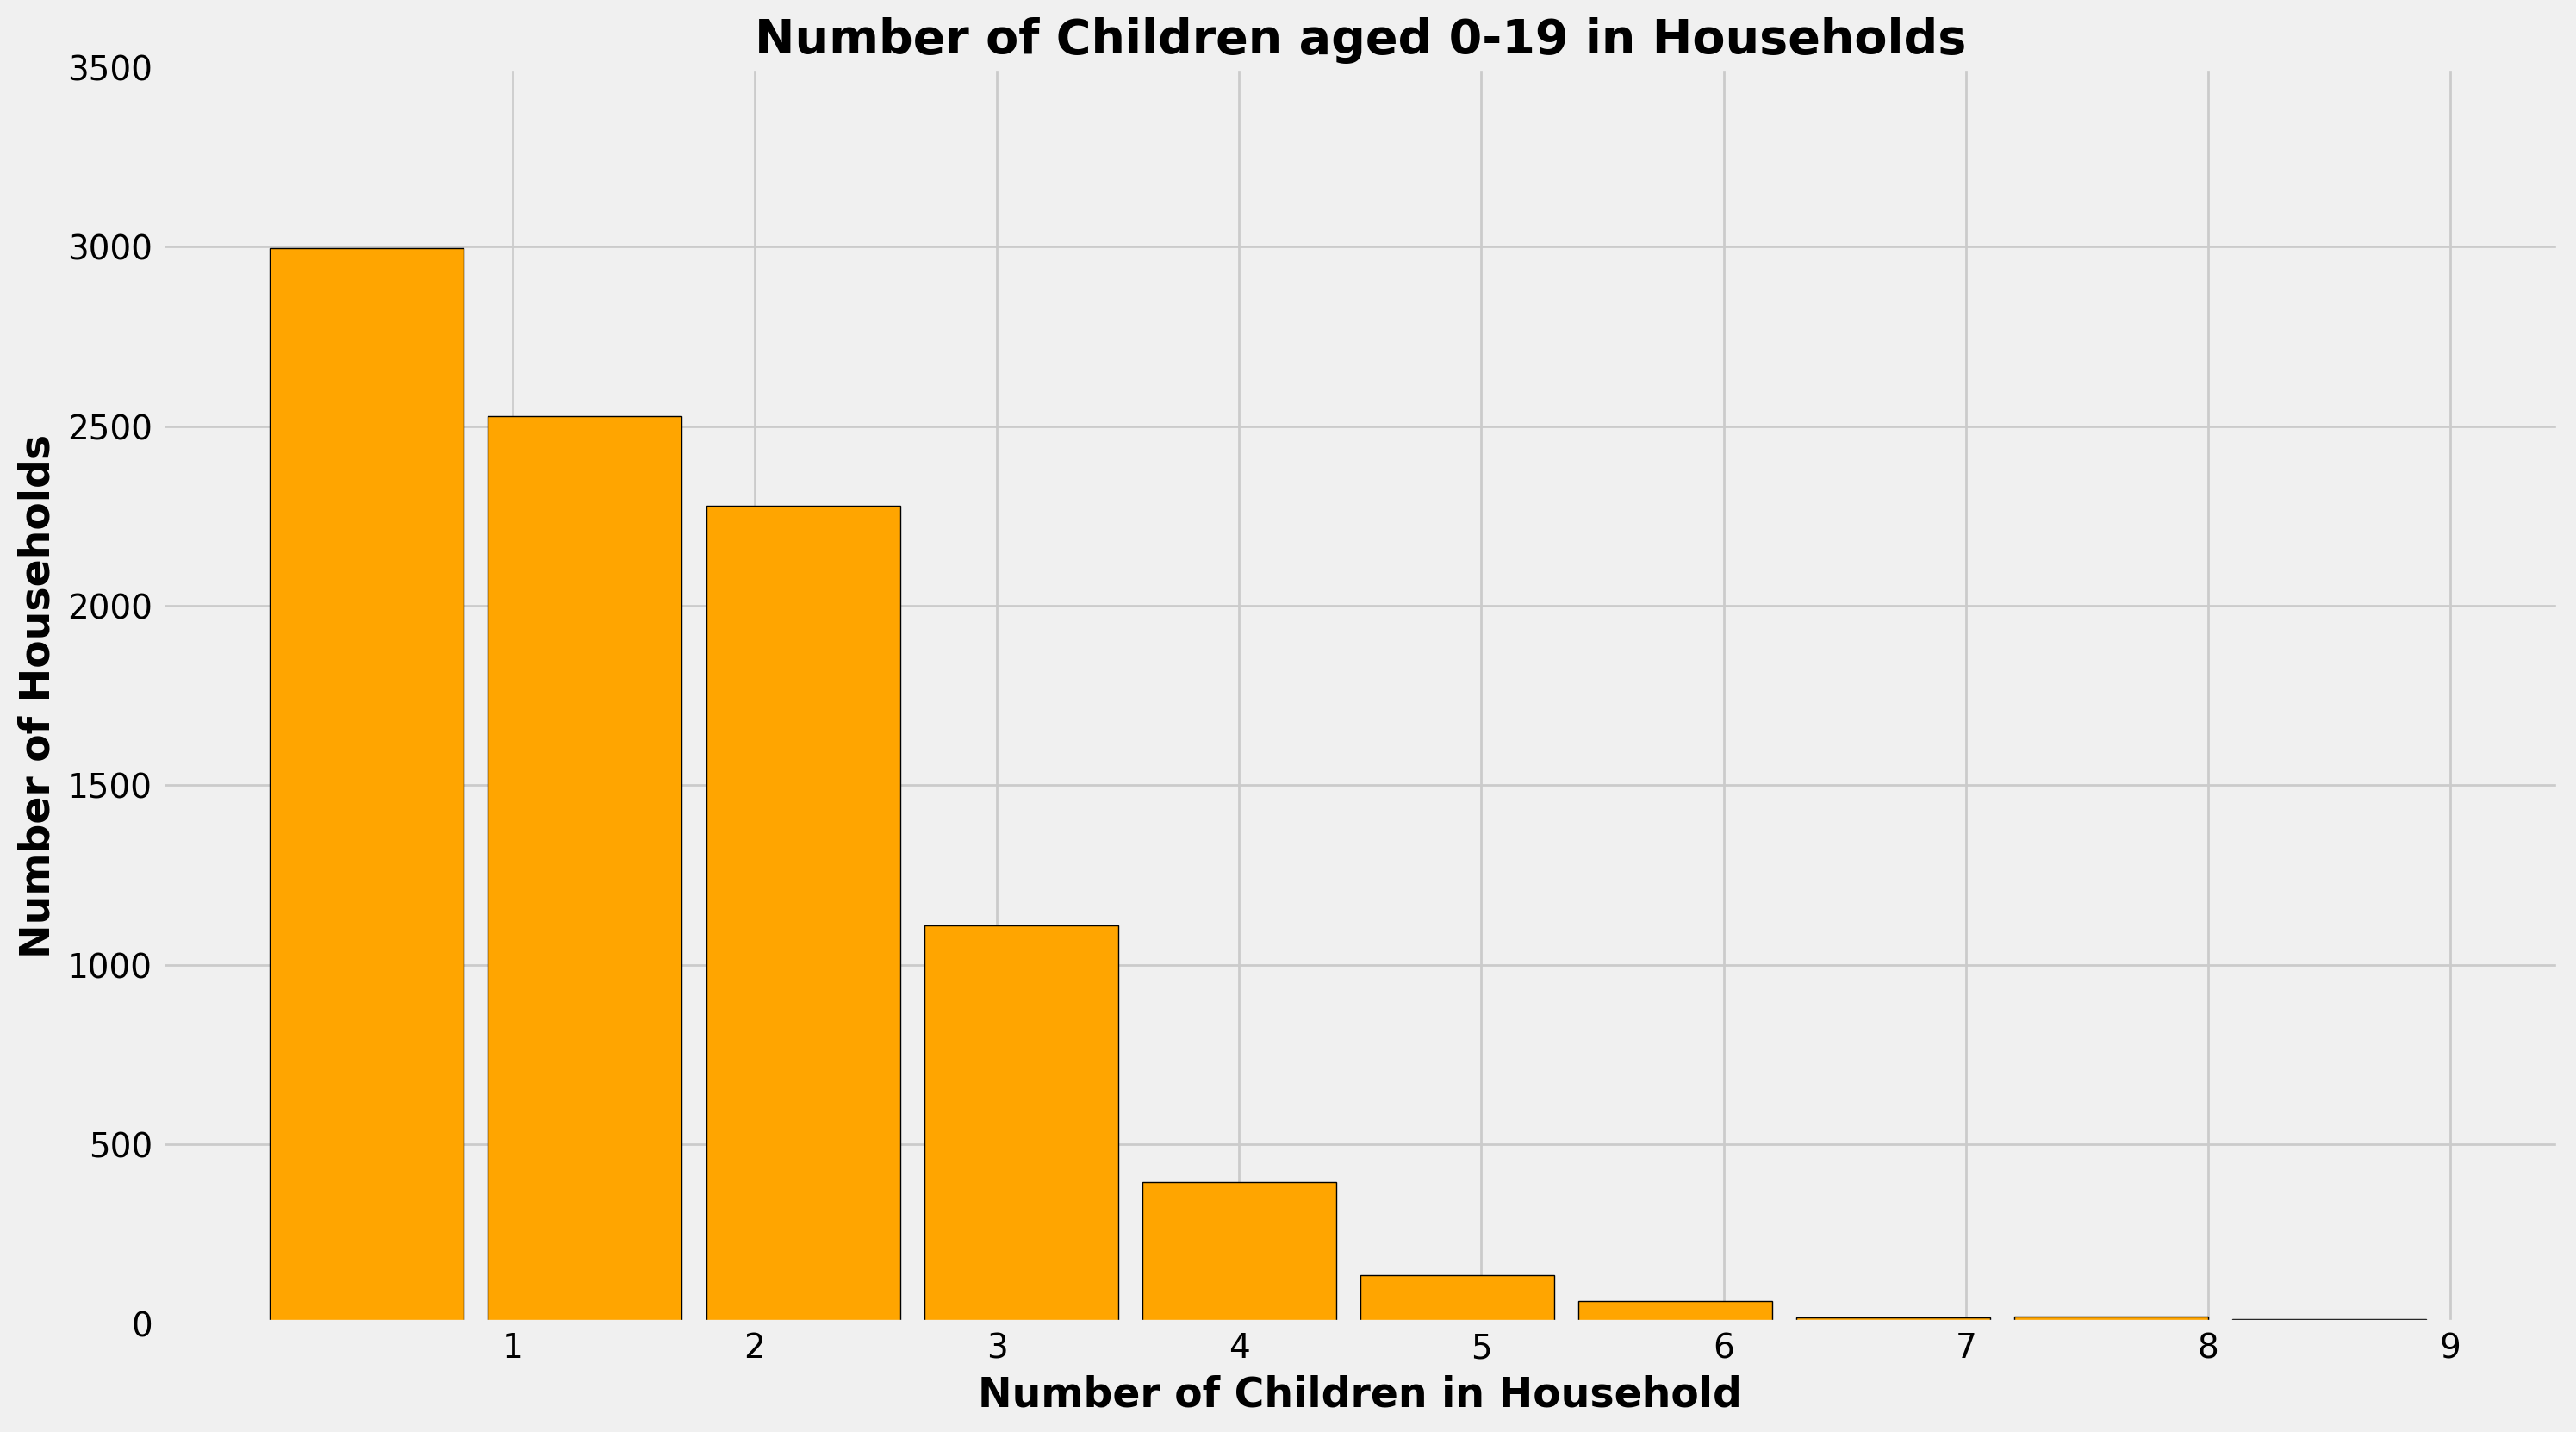

In [42]:
plt.hist(df_train['hogar_nin'], width=0.8, edgecolor='k', color='orange')
plt.title('Number of Children aged 0-19 in Households', fontweight='bold', fontsize=20)
plt.xlabel('Number of Children in Household', fontweight='bold', fontsize=17)
plt.ylabel('Number of Households', fontweight='bold', fontsize=17)
plt.xticks((1, 2, 3, 4, 5, 6, 7, 8, 9), [1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(0, 3500)
plt.show()

## Distribution of Number of Adults in Households

In [43]:
hogar_adul= df_train['hogar_adul']

print(hogar_adul)

0       1
1       1
2       1
3       2
4       2
       ..
9552    4
9553    4
9554    4
9555    4
9556    4
Name: hogar_adul, Length: 9557, dtype: int64


In [44]:
max_hogar_adul = df_train["hogar_adul"].max()
print("The most number of adults in a household is: ", max_hogar_adul)

The most number of adults in a household is:  9


In [45]:
min_hogar_adul = df_train["hogar_adul"].min()
print("The least number of adults in a household is: ", min_hogar_adul)

The least number of adults in a household is:  0


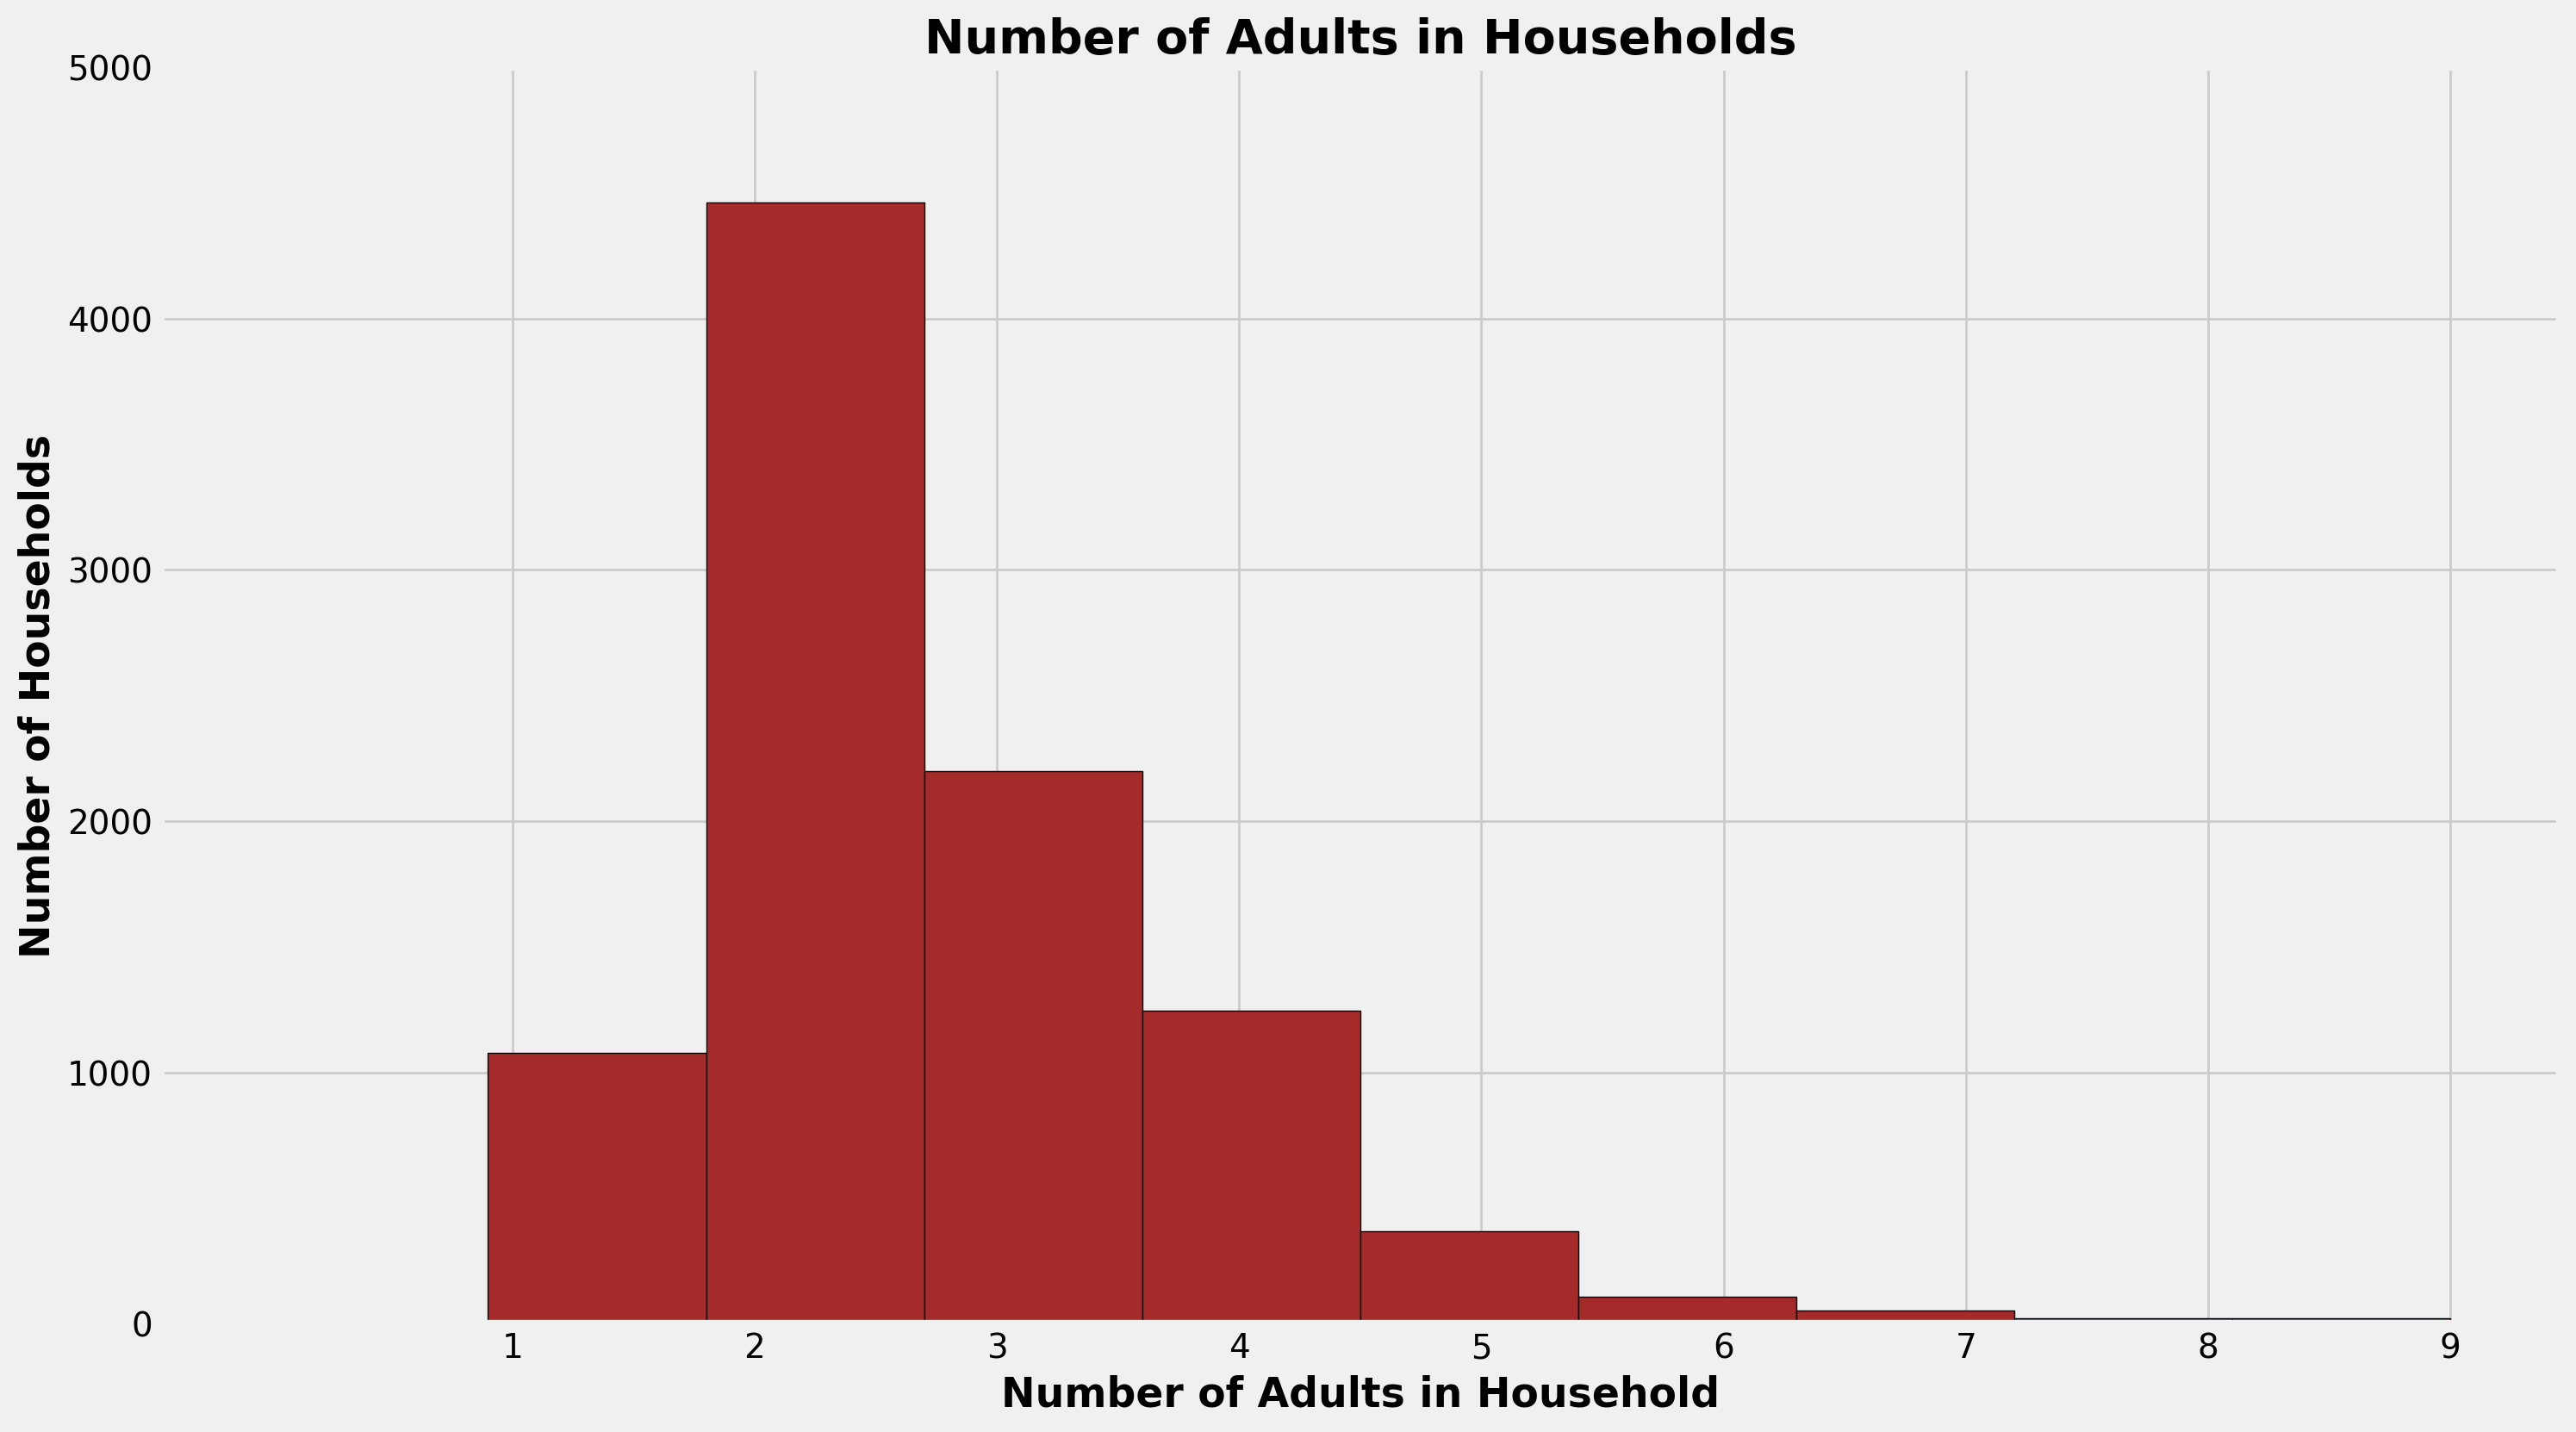

In [46]:
plt.hist(df_train['hogar_adul'], width=0.9, edgecolor='k', color='brown')
plt.title('Number of Adults in Households', fontweight='bold', fontsize=20)
plt.xlabel('Number of Adults in Household', fontweight='bold', fontsize=17)
plt.ylabel('Number of Households', fontweight='bold', fontsize=17)
plt.xticks((1, 2, 3, 4, 5, 6, 7, 8, 9), [1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(0, 5000)
plt.show()

## Distribution of Households according to Number of Rooms in their Dwellings

The more number of rooms present in the household, the higher the maintance work required, and therefore, the higher the need for financial aid.

In [47]:
max_rooms = df_train["rooms"].max()
print(max_rooms)

11


In [48]:
min_rooms = df_train["rooms"].min()
print(min_rooms)

1


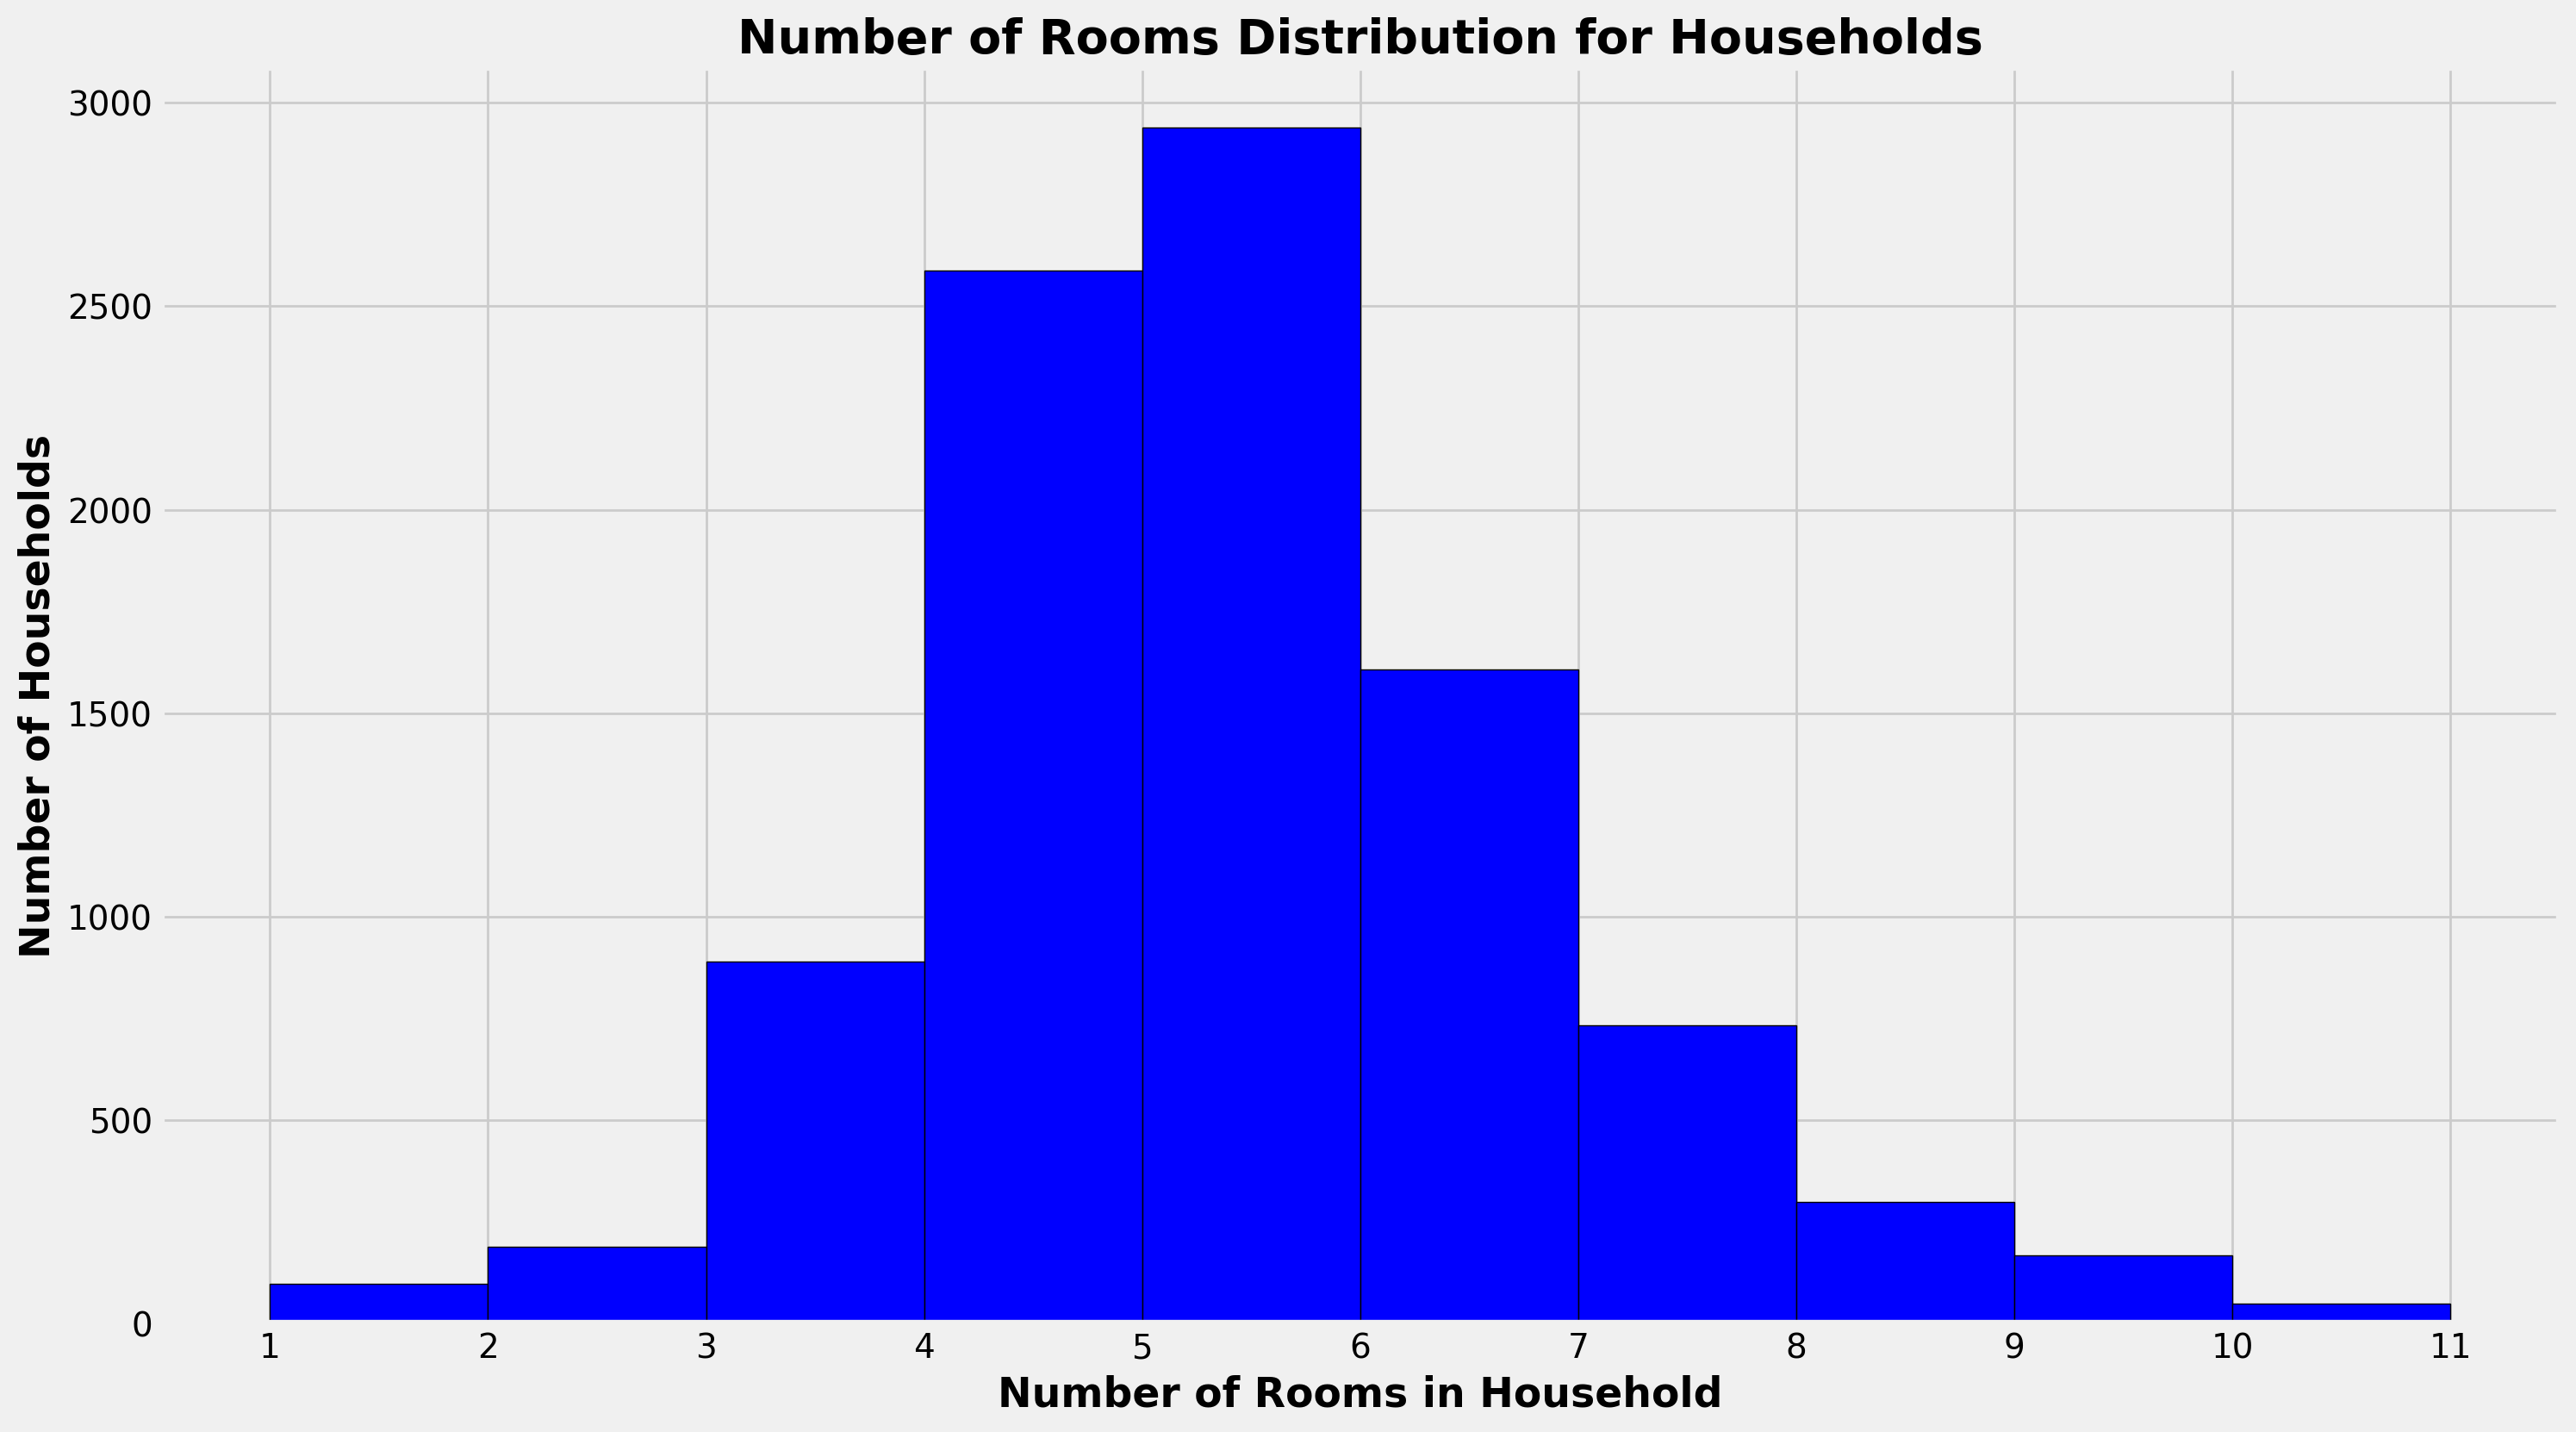

In [49]:
plt.hist(df_train['rooms'], width=1, edgecolor='k', color= 'blue')
plt.title('Number of Rooms Distribution for Households', fontweight='bold', fontsize=20)
plt.xlabel('Number of Rooms in Household', fontweight='bold', fontsize=17)
plt.ylabel('Number of Households', fontweight='bold', fontsize=17)
plt.xticks((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.show()

## Count of households by total males in the household

Text(0, 0.5, 'Number of Households')

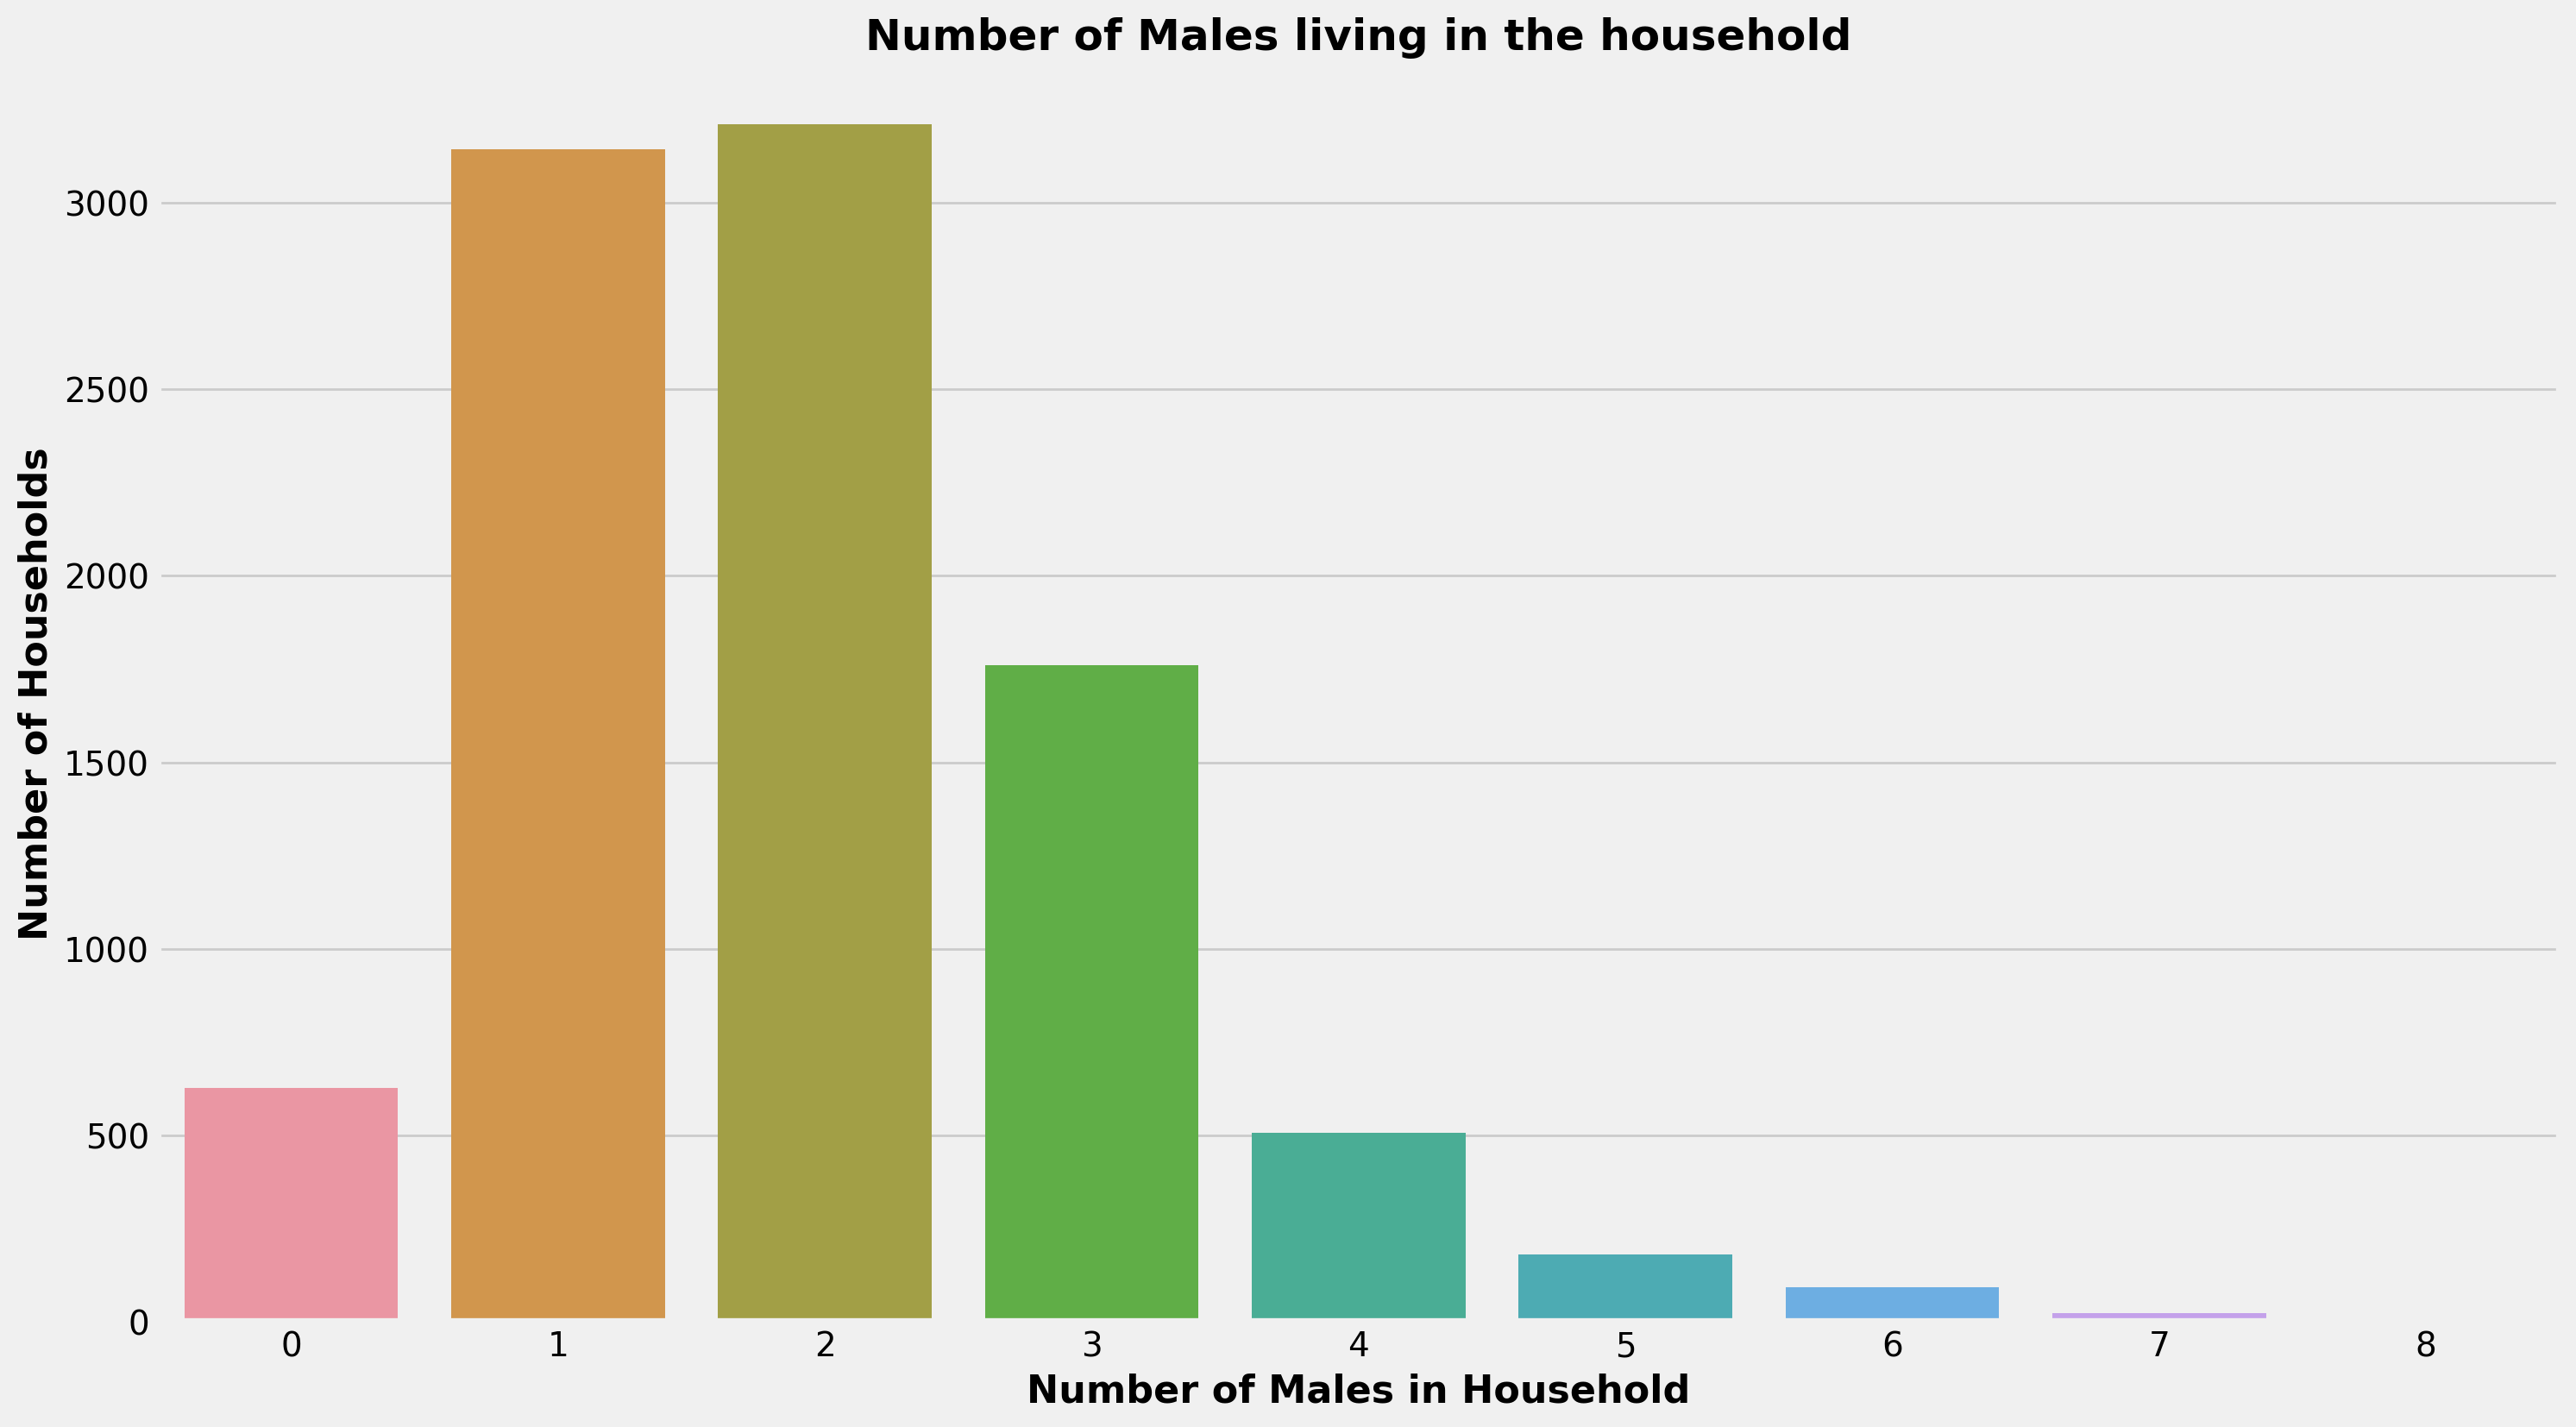

In [50]:
sns.countplot(x='r4h3', data=df_train)
plt.title('Number of Males living in the household', fontweight='bold', fontsize=18)
plt.xlabel('Number of Males in Household', fontweight='bold', fontsize=16)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)

## Count of households by total females in the household

Text(0, 0.5, 'Number of Households')

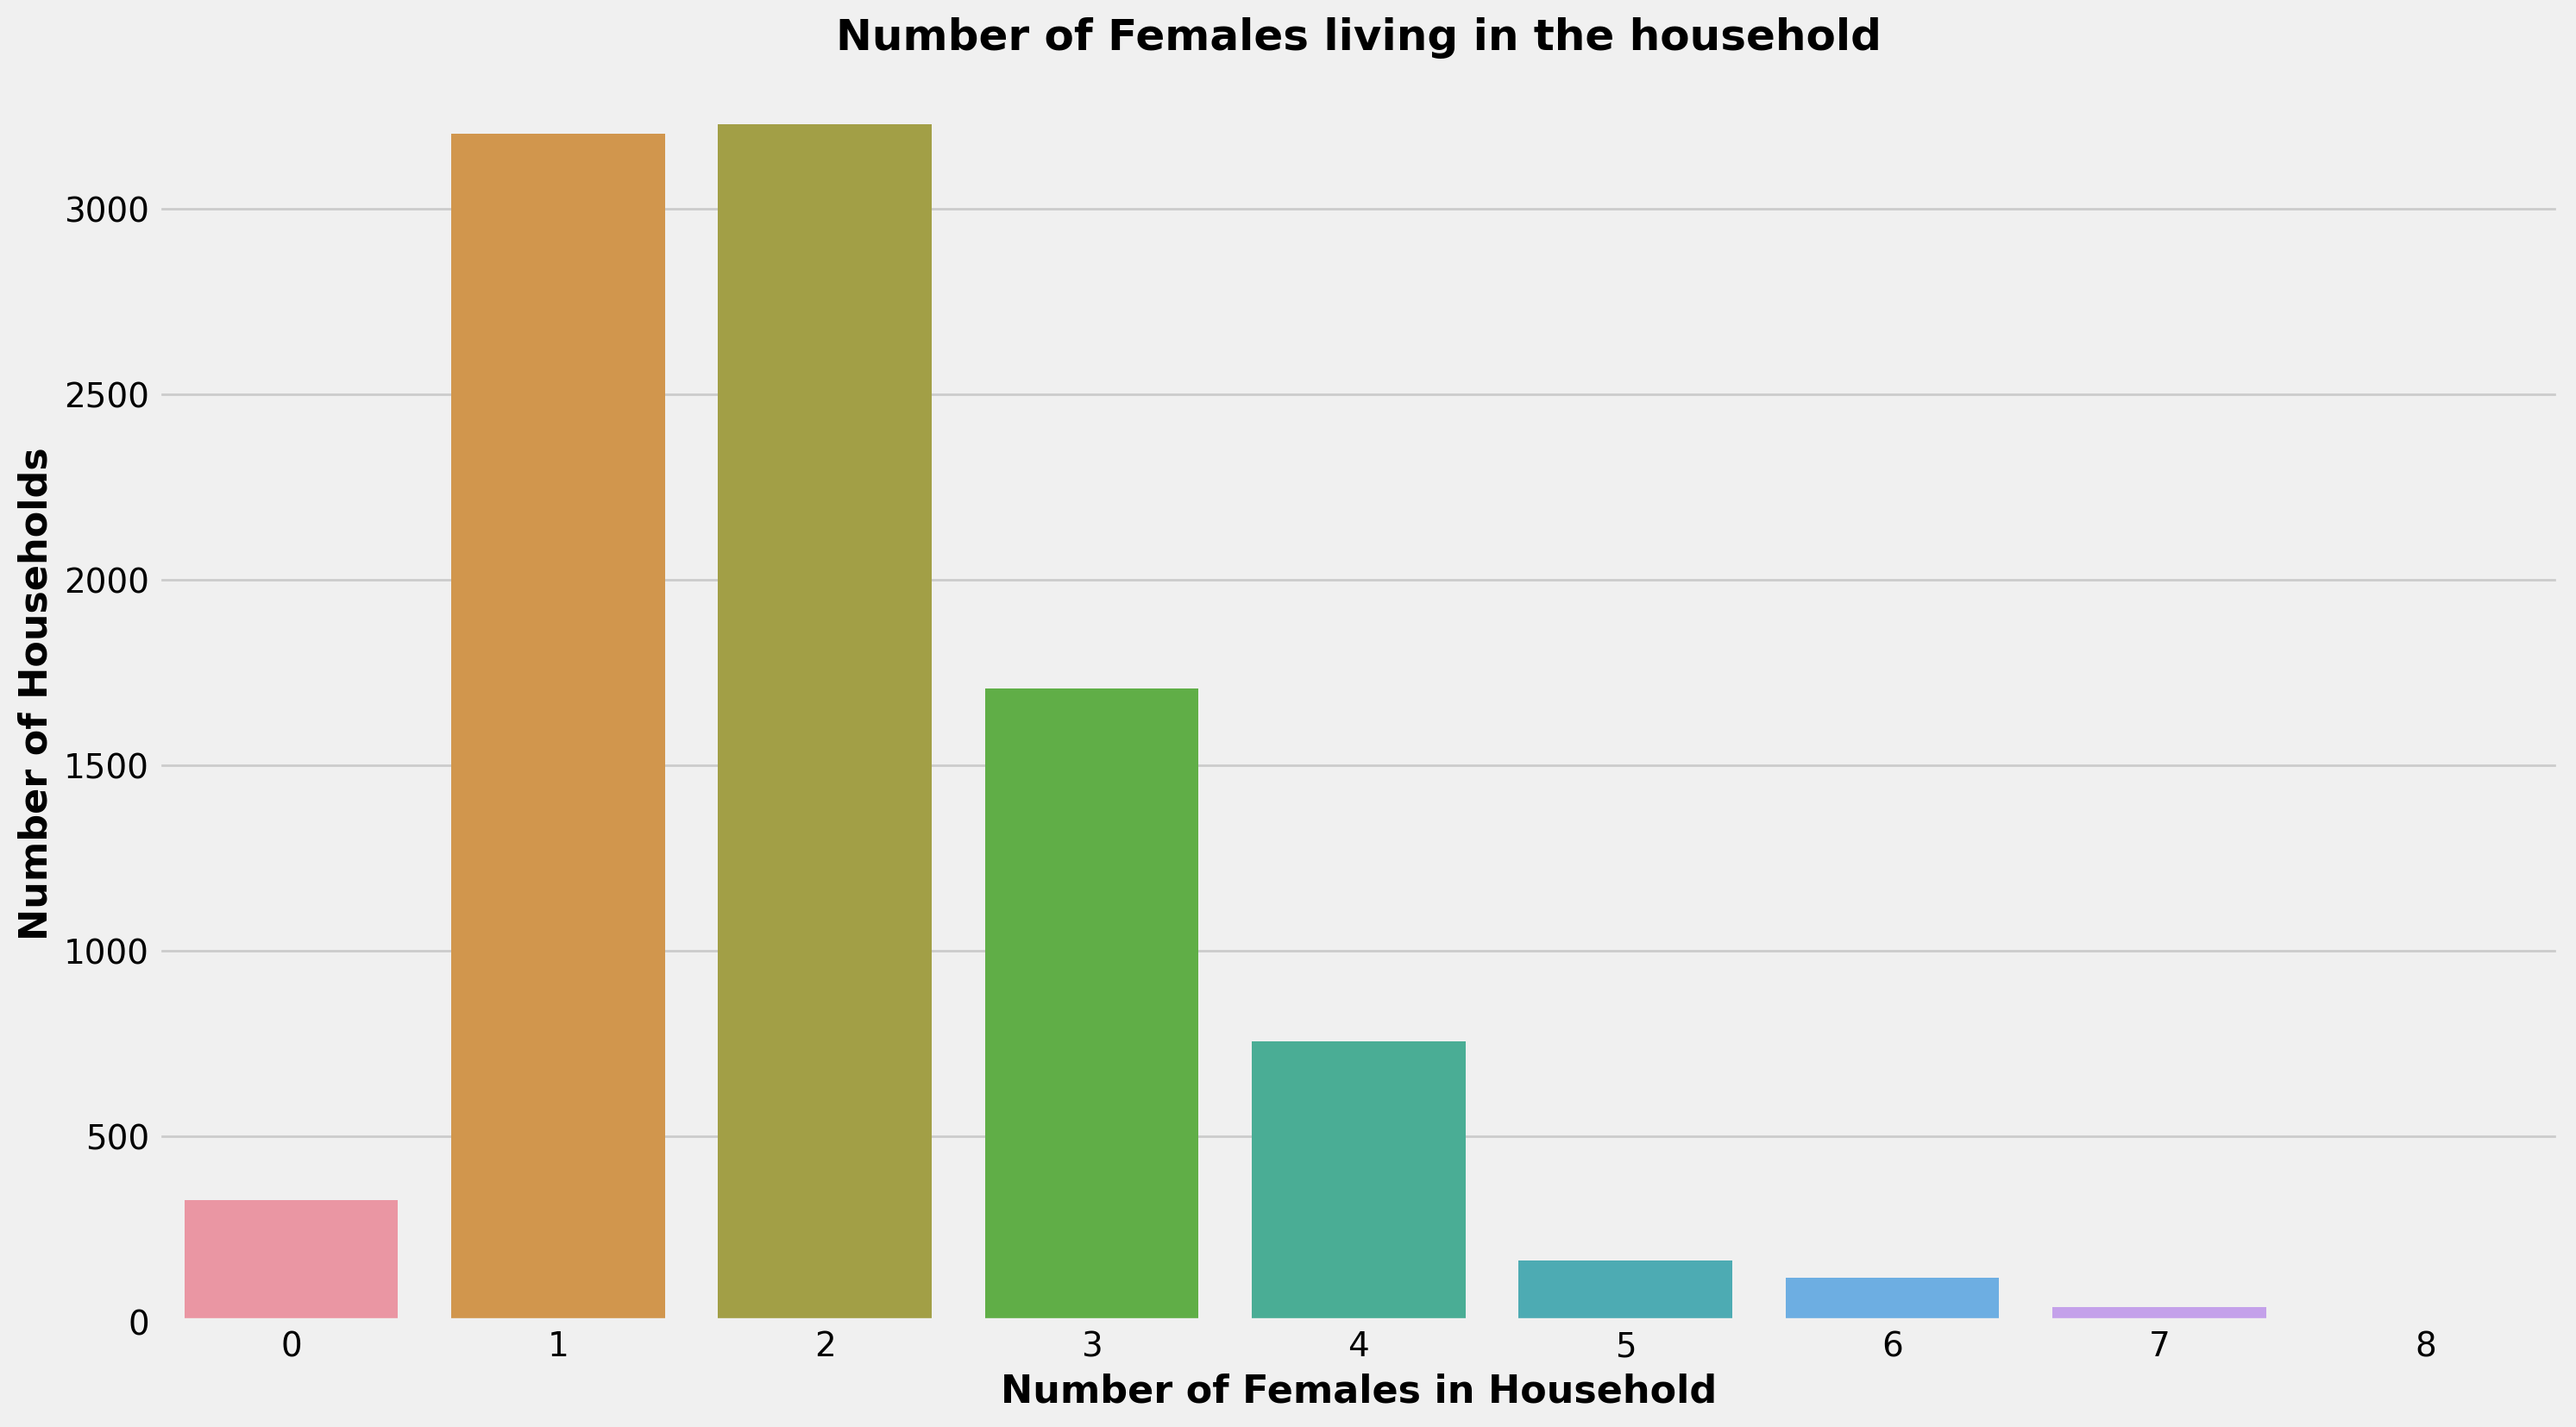

In [51]:
sns.countplot(x='r4m3', data=df_train)
plt.title('Number of Females living in the household', fontweight='bold', fontsize=18)
plt.xlabel('Number of Females in Household', fontweight='bold', fontsize=16)
plt.ylabel('Number of Households', fontweight='bold', fontsize=16)

## Distribution of Households according to years of education of male head of household

<Extracted from the Glossary>
- both columns are named 'edjefe' so not sure if data is accurate, in the first place
    
------
102. edjefe, years of education of male head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0
103. edjefa, years of education of female head of household, based on the interaction of
escolari (years of education), head of household and gender, yes=1 and no=0

In [52]:
edjefe = df_train['edjefe']

print(edjefe)

0       10.0
1       12.0
2        0.0
3       11.0
4       11.0
        ... 
9552     9.0
9553     9.0
9554     9.0
9555     9.0
9556     9.0
Name: edjefe, Length: 9557, dtype: float64


In [53]:
max_edjefe = df_train["edjefe"].max()
print("The highest years of education for a male head of household is: ", max_edjefe)

The highest years of education for a male head of household is:  21.0


In [54]:
min_edjefe = df_train["edjefe"].min()
print("The lowest years of education for a male head of household is: ", min_edjefe)

The lowest years of education for a male head of household is:  0.0


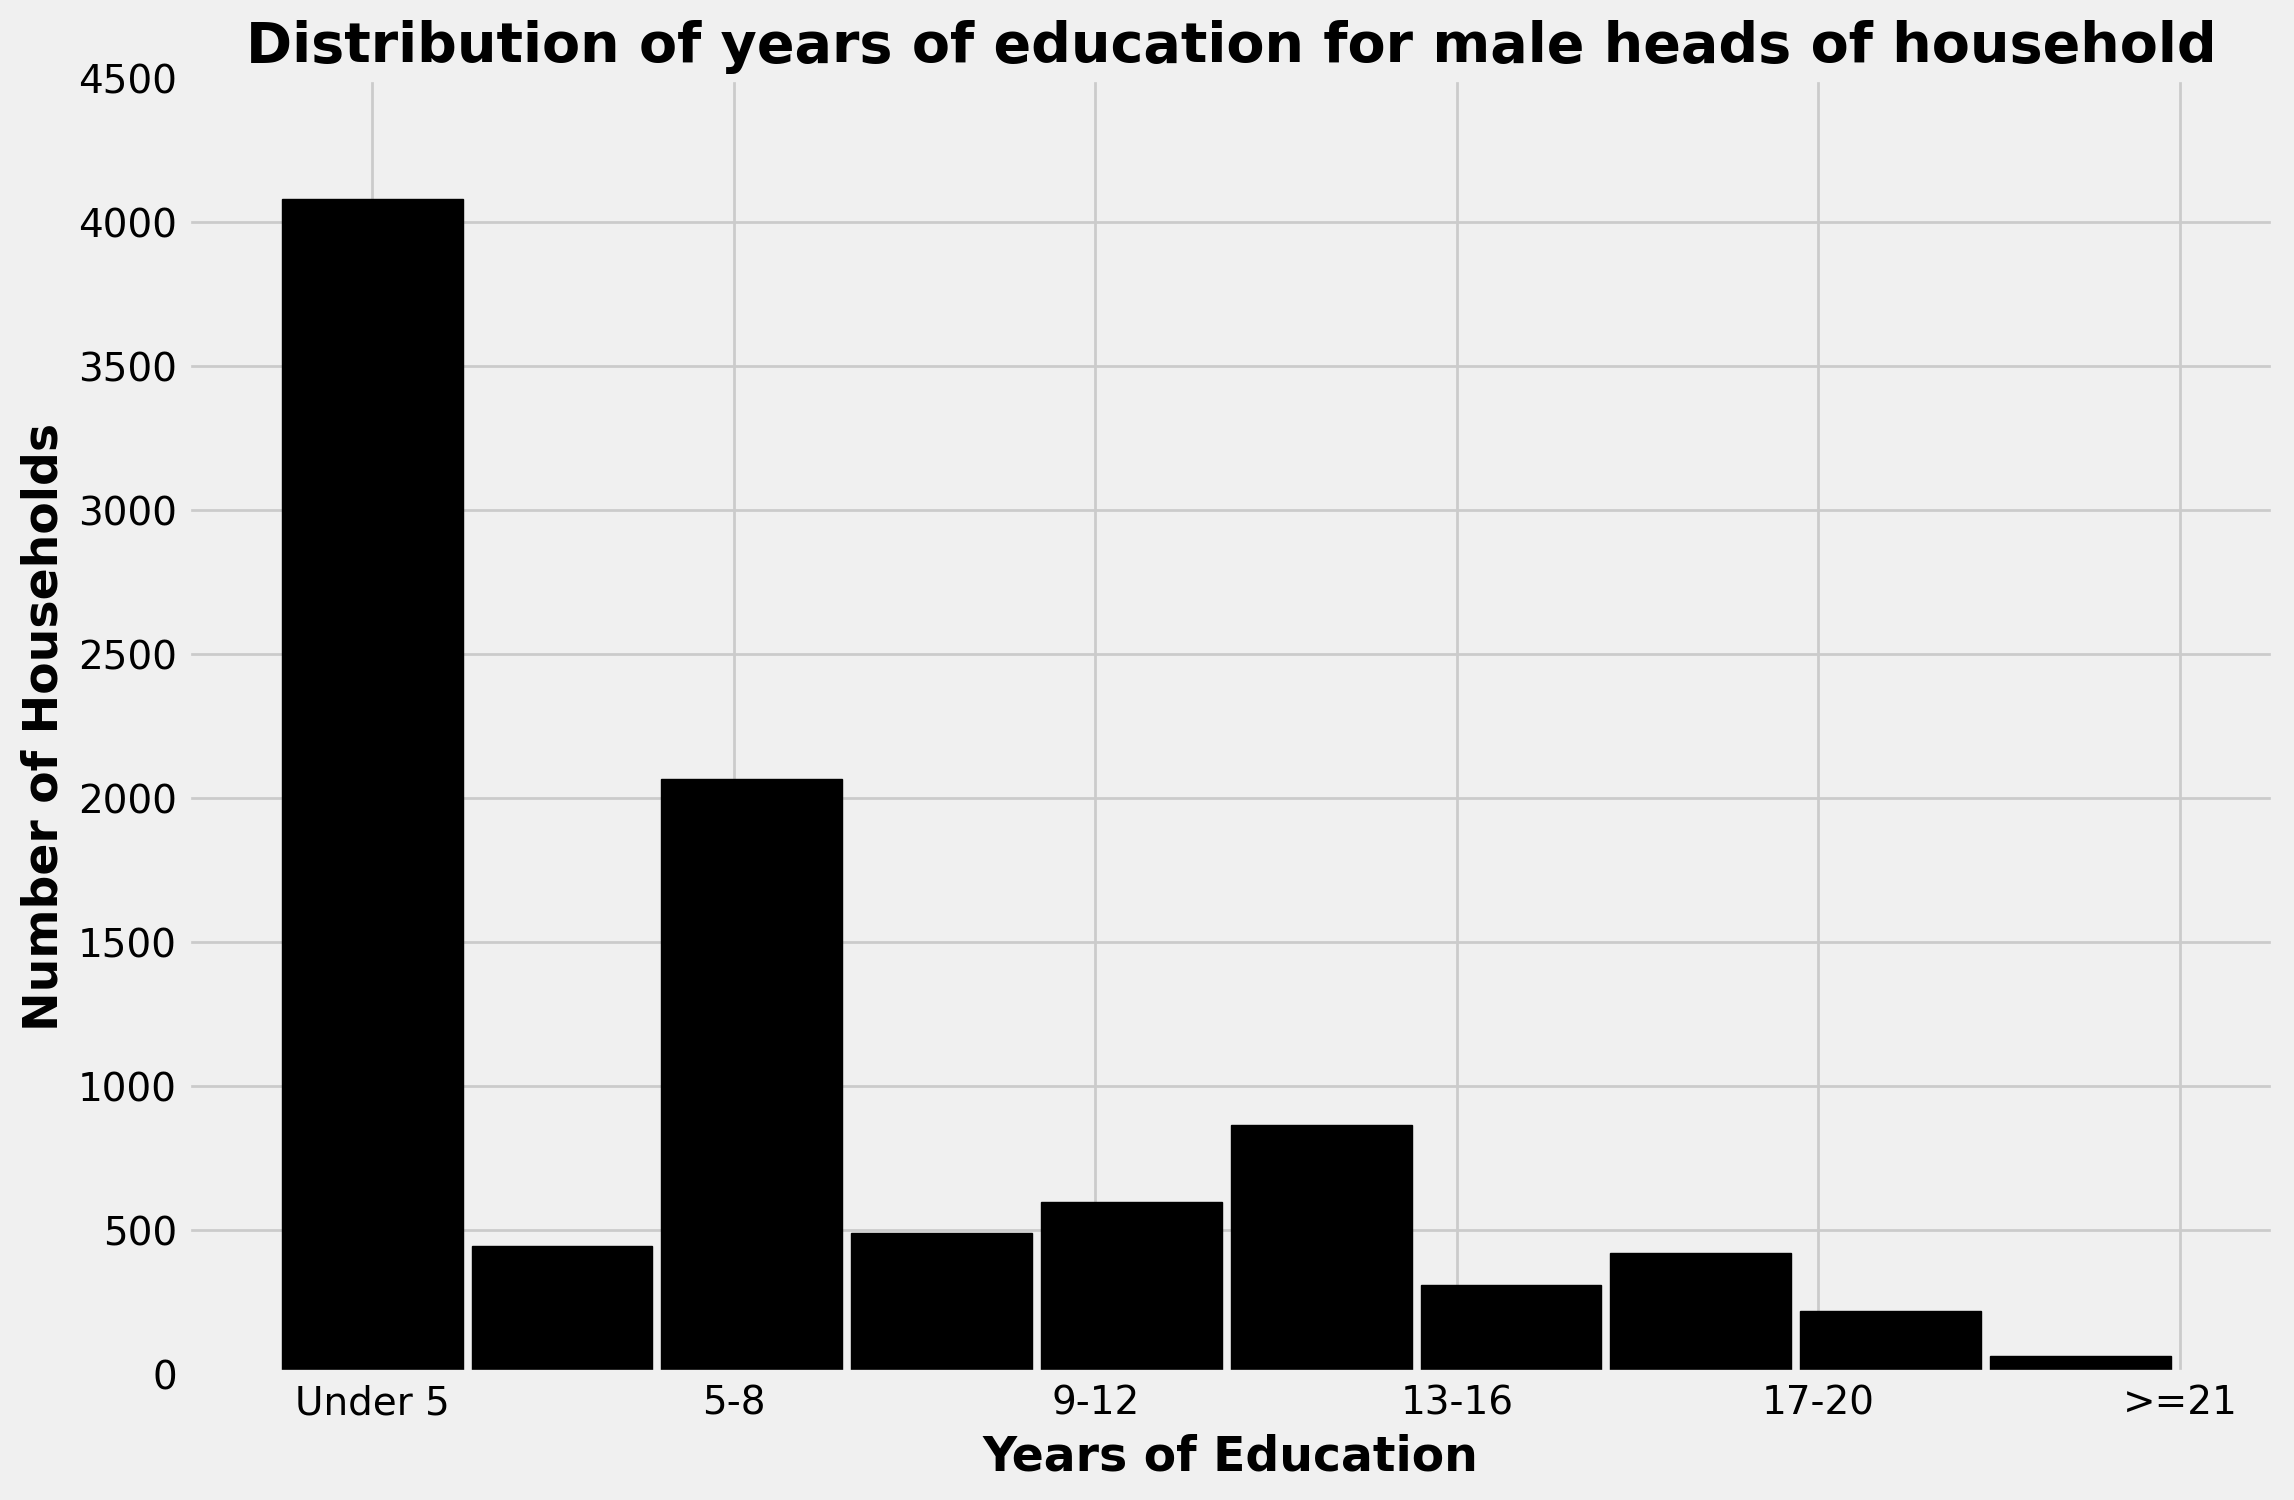

In [55]:
plt.figure(figsize=(12, 8))
plt.hist(df_train['edjefe'], width=2, edgecolor='k', color='black')
plt.title('Distribution of years of education for male heads of household', fontweight='bold', fontsize=20)
plt.xlabel('Years of Education', fontweight='bold', fontsize=17)
plt.ylabel('Number of Households', fontweight='bold', fontsize=17)
plt.xticks((1, 5, 9, 13, 17, 21), ['Under 5', '5-8', '9-12', '13-16', '17-20', '>=21'])
plt.ylim(0,4500)
plt.show()

## Distribution of Households according to years of education of female head of household

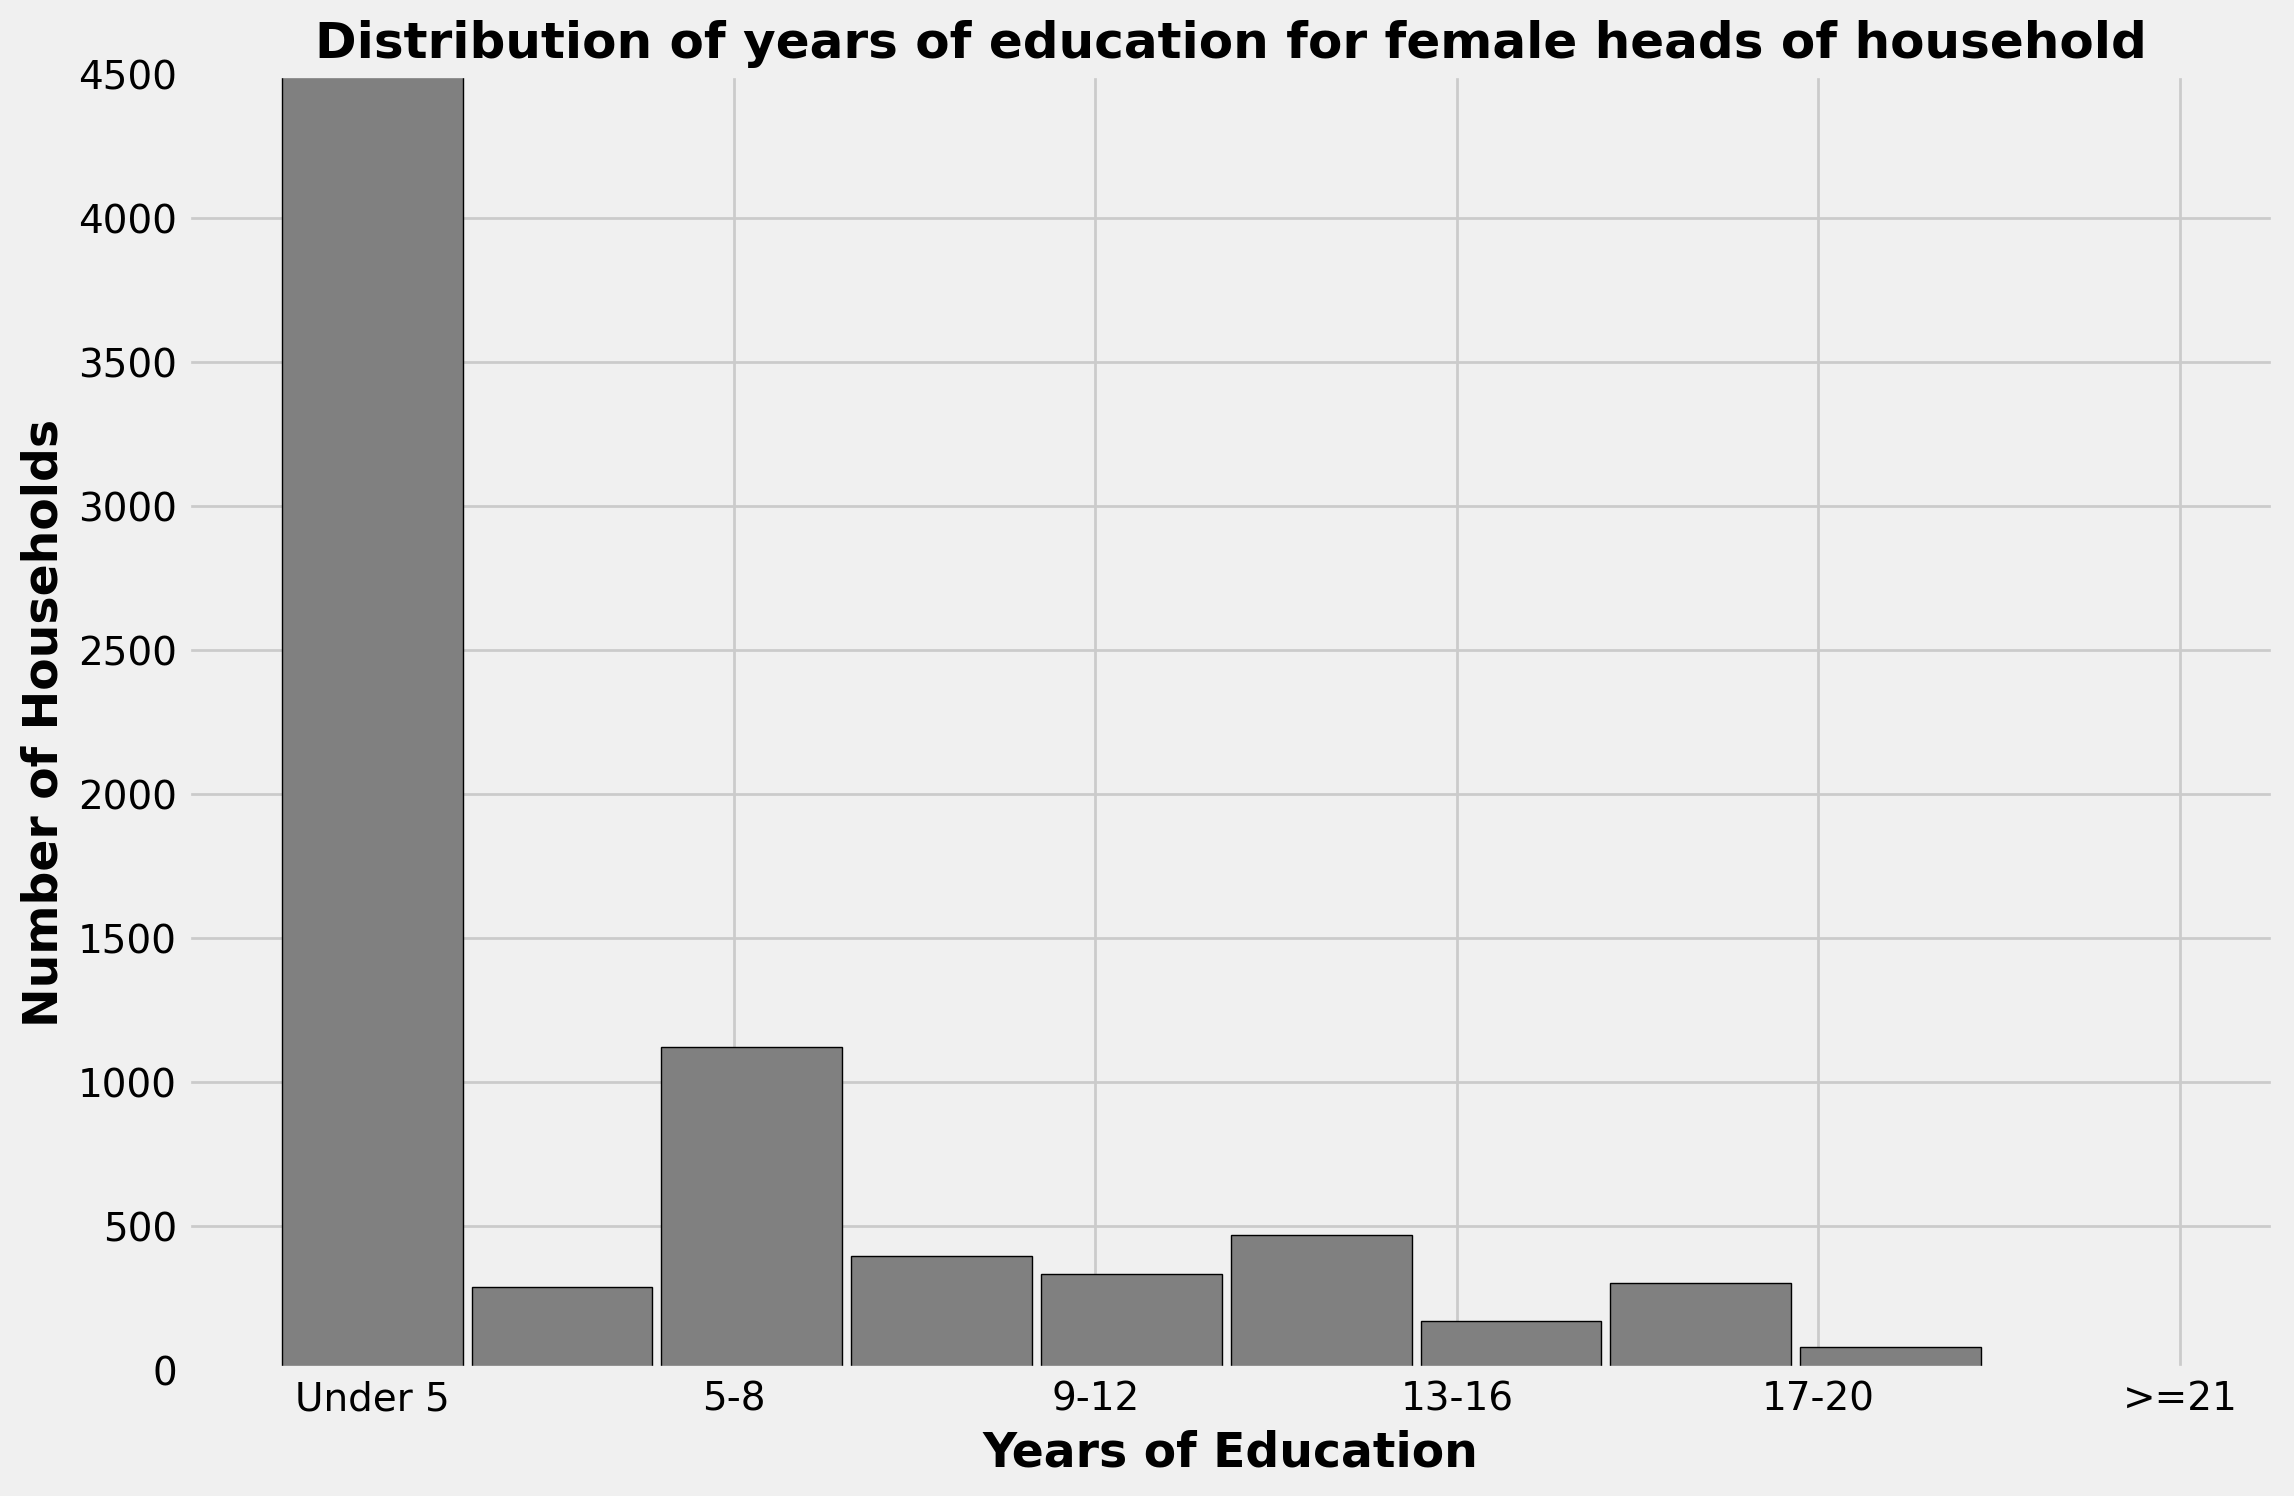

In [56]:
plt.figure(figsize=(12, 8))
plt.hist(df_train['edjefa'], width=2, edgecolor='k', color='gray')
plt.title('Distribution of years of education for female heads of household', fontweight='bold', fontsize=18)
plt.xlabel('Years of Education', fontweight='bold', fontsize=17)
plt.ylabel('Number of Households', fontweight='bold', fontsize=17)
plt.xticks((1, 5, 9, 13, 17, 21), ['Under 5', '5-8', '9-12', '13-16', '17-20', '>=21'])
plt.ylim(0,4500)
plt.show()